In [1]:
import numpy as np
import matplotlib.pyplot as plt

I will write this section as if it is already in the results section of the report. However, I will probably run it a couple more times with smaller dx’s and dt’s so some stuff might still change. 

The cells will follow the same structure as the methodology section, and they will have the same titles. 

To Do: Write up discussion.

# Introduction to chapter 'Results diffusion model'


In the last section we saw that some isotopes are expected to be released from the fuel (refer to baseline diffusion release). In this section you will find a more thorough analysis as to how that is possible using a finite elements method and Ficks first and second laws as described in the literature review (refer to literature review). The methodology section (refer) describes how this is done more thoroughly, and in this section you will find the results.

First we will dive into the normal release of Xenon and Krypton (noble gasses and the most volatile) through the cladding. The process through which this is possible is described in the literature review (refer). The main challenge, as also posted in the literature review, is finding a suitable diffusion coefficient. In this section we will also compare the literature thermal diffusion coefficients of the noble gasses to the diffusion coefficient we find when comparing Xe-133 to Xe-135 release. (refer to sections)

Using the estimated diffusion coefficients we can calculate the release of various volatile, gaseous and semi-volatile fission products. 

With gamma spectroscopy data from the primary water during fuel defects we can then calculate how big the defect would have to be for the diffusion through water instead of cladding to account for the release. With this we can find the expected defect sizes for 2019, 2020 and 2021.

Lastly we can use this model to estimate the release of isotopes given a defect size. Thus, we can model what would be released if we were to have a defect of a certain size. 



## Calculate the release of isotopes from the fuel (3.3.2 in the methodology)

First we will import standard values and define the source term according to section \refer to section in methodology where source term is defined. 

Then we will calculate the actual release ratio between Xenon-133/Xenon-135 according to (refer to section in methodology) and we will use the model to calculate the release rate for different diffusion coefficients (refer to section in methodology). If the ratio between the two methods to calculate release rate is equal for a certain diffusion coefficient, we can extract a diffusion coefficient for the Iodine and Xenon combination (Since Iodine is the parent of Xenon and it is volatile)(refer to section in methodology). 

Using this and the measured release rate of Xenon (assuming steady state) we can calculate how much of the Xenon is off gassed due to the off gas system. This is an exponential function of time, and with the different half lives for Xenon-133 and Xenon-135 we can extract the parameters for the exponential function describing the off gassing system as a function of half life (refer to section in methodology).

Using this and the actual release of Kr-85m as measured by the gamma spectroscopy lab we can calculate the diffusion coefficient for Kr-85m. We can do this by again iterating over different diffusion coefficients and matching the calculated release rate (for different diffusion coefficients) to the actual release rate, thus giving us the diffusion coefficient for Kr-85m. (refer to section in methodology)

Using the Stokes Einstein equation (\eqref) for noble gasses we can calculate the diffusion coefficient of bare Xenon from this. Assuming the diffusion coefficient of the Xenon-Iodine combination is a weighted sum (\eqref) we can calculate the diffusion coefficient of Iodine (refer to section in methodology). 

This gives us the diffusion/release coefficients for: Bare Kr-85m, Bare Xenon, Bare Iodine and the Iodine-Xenon combination. Thus we have values of the release coefficient from a volatile isotope (Iodine) and noble gasses. The only thing we miss is the diffusion coefficient for semi-volatile fission products. We will assume that these are one factor of magnitude smaller.

This finally enables us to calculate the release rate for all relevant gaseous, volatile and semi-volatile diffusion coefficients. Since these are the only that escape the fuel. (refer to section in methodology)

The release rate can easily be recalculated to the activity in a 50mL sample as is sampled by the gamma spectroscopy lab. We know the detection limits for such as sample, and can thus calculate whether or not an isotope would be measured in normal operation (refer to section in methodology). 

# Standard values and Source term definition (procedure according to methodology)

In [2]:
# Other products
def Effective_lamb(t_half_p, t_half_d):
    Lamb_p = np.log(2)/(t_half_p ) # In seconds
    Lamb_d = np.log(2)/(t_half_d) # In seconds
    return (Lamb_p * Lamb_d)/(Lamb_p + Lamb_d)

def Effective_diffusion_coeff(t_half_p, D_p, t_half_d, D_d):
    Weight = t_half_p+t_half_d
    D1 = t_half_p*D_p
    D2 = t_half_d*D_d
    return (D1+D2)/Weight



# Gaseous, Diffusion coeff extrapolated from https://www.engineeringtoolbox.com/diffusion-coefficients-d_1404.html
M_Kr85m,  Lamb_Kr85m,  D_water_Kr85m,  Y_Kr85m = 85,   np.log(2)/(4.36*3600),                          2.8E-9,         0.015
M_Kr87,   Lamb_Kr88,   D_water_Kr88,   Y_Kr88  = 88,   np.log(2)/(2.77*3600),                          2.8E-9,         0.037 
M_Kr88,   Lamb_Kr87,   D_water_Kr87,   Y_Kr87  = 87,   np.log(2)/(78*60),                              2.8E-9,         0.027 
M_Xe133,  Lamb_Xe133,  D_water_Xe133,  Y_Xe133 = 133,  Effective_lamb(20.8*3600, 5.27*24*3600),        2.2E-9,         0.065
M_Xe135,  Lamb_Xe135,  D_water_Xe135,  Y_Xe135 = 135,  Effective_lamb(6.68*3600, 9.13*3600),           2.2E-9,         0.062
M_Xe138,  Lamb_Xe138,  D_water_Xe138,  Y_Xe138 = 138,  np.log(2) / (14.08 * 60),                       2.2E-9,         0.055 



isotopes = [
    {"M_Isotope": M_Kr85m, "Lamb": Lamb_Kr85m, "D_water": D_water_Kr85m, "Y": Y_Kr85m, "name": 'Kr85m'},
    {"M_Isotope": M_Kr87, "Lamb": Lamb_Kr87, "D_water": D_water_Kr87, "Y": Y_Kr87, "name": 'Kr87'},
    {"M_Isotope": M_Kr88, "Lamb": Lamb_Kr88, "D_water": D_water_Kr88, "Y": Y_Kr88, "name": 'Kr88'},
    {"M_Isotope": M_Xe138, "Lamb": Lamb_Xe138, "D_water": D_water_Xe138, "Y": Y_Xe138, "name": 'Xe138'},
    {"M_Isotope": M_Xe133, "Lamb": Lamb_Xe133, "D_water": D_water_Xe133, "Y": Y_Xe133, "name": 'Xe133'},
    {"M_Isotope": M_Xe135, "Lamb": Lamb_Xe135, "D_water": D_water_Xe135, "Y": Y_Xe135, "name": 'Xe135'},
]

## Calculating isotope concentration based on neutronics

First, to calculate the diffusion through cladding we will need to know a concentration of isotopes in the fuel itself. This can be calculated using the neutronics of the HFR (thus amount of fissions per second), the yield of an isotope is U-235 fission and the decay rate. 

We need to find the number of fissions per second. That can be calculated with:

\begin{equation}
    \phi = \frac{P}{N_{U235} \sigma_{235}^f E_r V }
\end{equation}

where:
P – reactor power (MeV.s-1)
$phi$ – neutron flux (neutrons.cm-2.s-1)
$\sigma$ – microscopic cross section (cm2)
N – atomic number density (atoms.cm-3)
Er – the average recoverable energy per fission (MeV / fission)
V – total volume of the core (m3)

N can be calculated using the mass of Uranium Silicide and the density so
M_U3Si2 = 3* (M_U238 * 0.8 + M_U235*0.2) + 2 * M_Si 
rho_U3Si2 = 4.8 #[g\cm3]

So
Mol_U3Si2 = rho_U3Si2/M_U3Si2 * 10**6 #[mol/m3]

N_U3Si2 = Mol_U3Si2 * V

With phi the flux we can determine the reaction rate like:

\begin{equation}
    F = \sigma_{U235} N_{U235} \phi 
\end{equation}

F is the fissions per m3





In [3]:
V_core = 33 * 20 * 0.6 * 0.06 * 0.00078 # [m3] FE's, Plates/Fe, rod length, width, thickness
sigma_U235 = 585 * 10**-24 #m2
P_core = 45*10**6


M_U238 = 238.050788
M_U235 = 235.0439299
M_Si = 28.084

M_U3Si2 = 3* (M_U238 * 0.8 + M_U235*0.2) + 2 * M_Si 
rho_U3Si2 = 4.8 #[g\cm3]


Mol_U3Si2 = rho_U3Si2/M_U3Si2 * 10**6 #[mol/m3] This is thus also the mols U235/m3!

E_f = 200.7*10**6*1.6*10**-19

N_A = 6.022 * 10**23

N_U235 = Mol_U3Si2 * V_core * N_A

phi = P_core/(N_U235 * E_f * V_core *sigma_U235)
print(phi)

F = sigma_U235 * N_U235 * phi 
print(F)

1854292665271663.2
7.56143319670973e+19



However, after writing this up I concluded that the same can easily be achieved by simply dividing the thermal power of the reactor by the average enery from fission... This should give the same answer

In [14]:
# Easier calculation

Number_of_fissions_per_second_core = P_core/E_f
F_m3 = Number_of_fissions_per_second_core/V_core
print(F_m3)

7.56143319670973e+19


## Modified Fick's second law

With that we know that the concentration in the fuel is a function of production rate $f$, yield $Y$, the number of isotopes decaying over time $\lambda$ and the release rate through the cladding, which is location and time dependent:

\begin{equation}
    \frac{\partial C(x,t)}{\partial t} = \nabla \cdot (D(x)\nabla C) - \lambda C + f*Y*t
\end{equation}

We solve this using a finite difference scheme (include and explain the class)



In [199]:


class IsotopeDiffusionTemperature:
    def __init__(self, M_Isotope, Lamb, Y,  D_clad, D_water = None):
        self.M_Isotope = M_Isotope       # Isotope mass
        self.Lamb = Lamb                 # Decay constant
        #self.D_water = D_water
        self.D_clad = D_clad
        self.Y = Y
    
    def T_linear(self, x, T0, TL, L):
        return T0 + (TL - T0) * x / L

    def D_func(self, T):
        D = 9.2e-5 * np.exp(-55.25 / (8.314e-3 * T))
        return D

    def Finite_difference_scheme_gasses(self, M, N, Lamb, Temp_In, Temp_Out, dt, dx, Y, L, matrix_thickness, D_fuel):
        Mass_Isotope = self.M_Isotope    # Isotope mass

        f = 7.56143319670973e+19
        u = np.zeros((N + 1, M + 1))     # Initialize concentration matrix
        u[N // 2, :] = f*Y                 # Set the production rate through the fuel

        R_t = np.zeros(M + 1)            # Initialize the release rate array

        x = np.linspace(-L - matrix_thickness, L + matrix_thickness, N + 1)     # Spatial grid

        for j in range(M):
            for i in range(1, N):
                if -L - matrix_thickness < x[i] < -matrix_thickness or matrix_thickness < x[i] < L + matrix_thickness:
                    
                    ## Cladding regions
                    T = self.T_linear(x[i], Temp_In, Temp_Out, L)
                    M_H = 2
                    D = self.D_func(T) * np.sqrt(M_H / self.M_Isotope)                                               # Calculate diffusion coefficient
                    
                    # Update concentration using the finite difference equation
                    u[i, j + 1] = u[i, j] + D * dt / dx ** 2 * (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) - self.Lamb * dt * u[i, j]
                
                elif -matrix_thickness <= x[i] <= matrix_thickness:
                    
                    ## Fuel region
                    D = D_fuel           # Use diffusion coefficient isotope in fuel
                    
                    # Update concentration using the finite difference equation
                    u[i, j + 1] = u[i, j] + D * dt / dx ** 2 * (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) - self.Lamb * dt * u[i, j] + f * Y * dt

            u[0, j + 1] = u[0, j]        # Left boundary condition (Dirichlet) meaning that concentration is constant at edge left cladding
            u[N, j + 1] = u[N, j] + D * dt / dx * (u[N - 1, j] - u[N, j]) - self.Lamb * dt * u[N, j]  # Set the right boundary condition

            # Identify the index corresponding to the boundary between fuel and cladding
            boundary_idx = np.argmin(np.abs(x - matrix_thickness))
            
            # Diffusion rate at the boundary between the fuel and cladding
            dc_dx = (u[N - 1, j] - u[N, j]) / dx
            
            D_boundary = D_clad = self.D_func(Temp_Out) * np.sqrt(M_H / self.M_Isotope)
            J = -D_boundary * dc_dx                                       # Flux at the boundary
            A = 1  # Area
            R_t[j + 1] = (-J * A)                                            # Update the release rate

        return u, R_t
  
    def run_simulation(self, Temp_In, Temp_Out, T_gas, isotope_name, Y,  matrix_thickness, D_fuel, M, N):
        A = 1  # Area
        R = 8.314e-3                                     # Gas constant in kJ/(mol*K)
        Temp = 273.15 + 42                               # Temperature in Kelvin

        M_H2 = 2                                         # Hydrogen mass

        L = 0.00038                                      # Half-width of the fuel
        M_gas = M
        

        L_matrix = -matrix_thickness                     # Left matrix thickness
        L_total = L - L_matrix                           # Total length of the fuel

        N_total = N + int(N * (matrix_thickness / L))    # Total number of spatial steps

        dx = L_total / N_total                           # Spatial step size
        dt_gas = T_gas / M_gas                           # Time step size

        x = np.linspace(-L - matrix_thickness, L + matrix_thickness, N + 1)  # Spatial grid

        t_gas = np.linspace(0, T_gas, M_gas + 1)                             # Time grid
        
    
        # Update the method call to include the modified N_total
        u_gas, R_t_gas = self.Finite_difference_scheme_gasses(M_gas, N, self.Lamb, Temp_In, Temp_Out, dt_gas, dx, Y, L, matrix_thickness, D_fuel)
        boundary_idx = np.argmin(np.abs(x - matrix_thickness))  # Find index of the boundary
        
        #print(R_t_gas)

        concentration_boundary = u_gas[boundary_idx, -1]  # Concentration at the boundary at the final time
        #print(f'The concentration of {isotope_name} at the boundary after time', T_gas/3600/24 ,  'days is', concentration_boundary)

        # Return a dictionary with the results
        return {"name": isotope_name, "concentration_boundary": concentration_boundary}, R_t_gas[-1]
    
    def plot_simulation(self, Temp_In, Temp_Out, T_gas, isotope_name, Y,  matrix_thickness, D_fuel, M, N):
        A = 1  # Area
        R = 8.314e-3                                     # Gas constant in kJ/(mol*K)
        Temp = 273.15 + 42                               # Temperature in Kelvin

        M_H2 = 2                                         # Hydrogen mass

        L = 0.00038                                      # Half-width of the fuel
        M_gas = M
        

        L_matrix = -matrix_thickness                     # Left matrix thickness
        L_total = L - L_matrix                           # Total length of the fuel

        N_total = N + int(N * (matrix_thickness / L))    # Total number of spatial steps

        dx = L_total / N_total                           # Spatial step size
        dt_gas = T_gas / M_gas                           # Time step size

        x = np.linspace(-L - matrix_thickness, L + matrix_thickness, N + 1)  # Spatial grid

        t_gas = np.linspace(0, T_gas, M_gas + 1)                             # Time grid
        
    
        # Update the method call to include the modified N_total
        u_gas, R_t_gas = self.Finite_difference_scheme_gasses(M_gas, N, self.Lamb, Temp_In, Temp_Out, dt_gas, dx, Y, L, matrix_thickness, D_fuel)
    
        num_steps = 5                                                        # Number of steps for plotting
        step_indices = np.linspace(0, len(t_gas) - 1, num_steps, dtype=int)  # Indices of the steps
        
        plt.figure(figsize = [12,6])
        for i in step_indices:
            plt.plot(x, u_gas[:, i], label='Al, t={} [d]'.format(np.round(t_gas[i] / (3600 * 24), 1)))  # Plot concentration profiles

        plt.xlabel('Distance from Centre-line [m]')
        plt.ylabel('Concentration [#/m3]')
        #plt.title(f'Diffusion {isotope_name} through fuel and aluminium/water')
        plt.grid()
        plt.xlim(0, L + matrix_thickness)
        plt.legend()
        
        # Add vertical dotted line at x=matrix_thickness
        plt.axvline(x=matrix_thickness, linestyle='dotted', color='red')
        # Add label for fuel cladding interface
        plt.text(matrix_thickness, 1, 'Fuel cladding interface', rotation=0, va='top', ha='left')
        
        plt.show()
        




We can use this class to calculate the concentration of different isotopes over time. This gives us the following result:

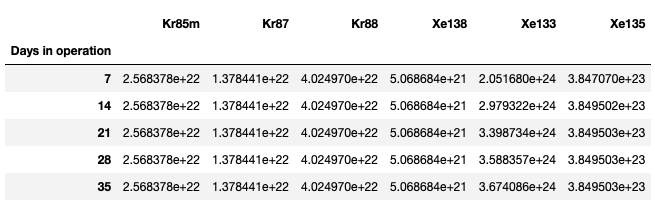

To be replaced with an updated version in a bit

We see that a balance is reached in the concentration over days, as the decay rate is equal to the production rate. Only for Xe-133 we see that this balance has not yet been reached after 35 days:

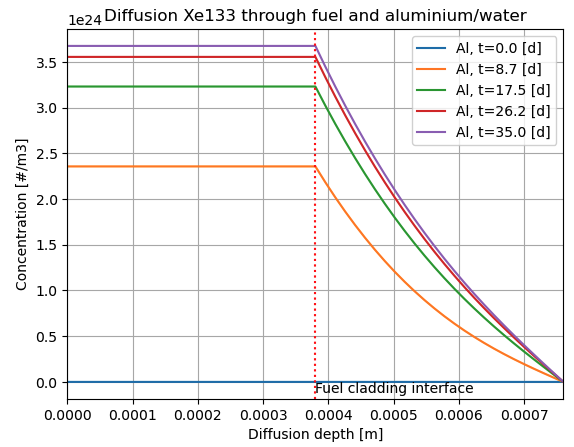

An important note here is that this doesn't take into account the neutron capture. Xe-135 has a very high neutron capture cross section, and thus this would significantly affect the number of Xe-135 neutrons present. However, as Xenon-135 has an iodine precursor which does not have a particularly large neutron capture cross-section, the assumption makes somewhat more sense.

To Do: run for Xe-135 a factor of magnitude smaller.

In [170]:
import pandas as pd

Days_in_period = [7, 14, 21, 28]
matrix_thickness = 0.00076/2
Temp_In = 273+63.4
Temp_Out = 273+42
D_fuel=1e-24
N=10
M=26733

# Create an empty dataframe
# Create an empty dataframe
df = pd.DataFrame()

# Loop over periods
for days in Days_in_period:
    T_gas = days * 24 * 3600
    results = []
    # Loop over isotopes
    for isotope_data in isotopes:
        isotope = IsotopeDiffusionTemperature(isotope_data['M_Isotope'],isotope_data['Lamb'],isotope_data['Y'], D_fuel, isotope_data['D_water'])
        result,_ = isotope.run_simulation(Temp_In, Temp_Out, T_gas, isotope_data['name'], isotope_data['Y'], matrix_thickness, D_fuel, M, N)
        results.append(result['concentration_boundary'])
    # Add the results for this period to the dataframe
    row_df = pd.DataFrame([results], columns=[isotope_data['name'] for isotope_data in isotopes])
    row_df['Days in operation'] = days  # Add a new column for the number of days
    df = pd.concat([df, row_df])

# Set 'Days_in_reactor' as index
df.set_index('Days in operation', inplace=True)

df


,Kr85m,Kr87,Kr88,Xe138,Xe133,Xe135
Days in operation,,,,,,
7,2.568378e+22,1.378441e+22,4.024970e+22,5.068684e+21,2.054459e+24,3.847070e+23
14,2.568378e+22,1.378441e+22,4.024970e+22,5.068684e+21,2.986254e+24,3.849502e+23
21,2.568378e+22,1.378441e+22,4.024970e+22,5.068684e+21,3.408858e+24,3.849503e+23
28,2.568378e+22,1.378441e+22,4.024970e+22,5.068684e+21,3.600520e+24,3.849503e+23


In [175]:
df = df.round(3)
df

,Kr85m,Kr87,Kr88,Xe138,Xe133,Xe135
Days in operation,,,,,,
7,2.568378e+22,1.378441e+22,4.024970e+22,5.068684e+21,2.054459e+24,3.847070e+23
14,2.568378e+22,1.378441e+22,4.024970e+22,5.068684e+21,2.986254e+24,3.849502e+23
21,2.568378e+22,1.378441e+22,4.024970e+22,5.068684e+21,3.408858e+24,3.849503e+23
28,2.568378e+22,1.378441e+22,4.024970e+22,5.068684e+21,3.600520e+24,3.849503e+23


In [167]:

# Generate LaTeX table from DataFrame
latex_table = df.to_latex()

# Print the LaTeX table
print(latex_table)


\begin{tabular}{lrrrrrrr}
\toprule
{} &         Kr85m &          Kr87 &          Kr88 &         Xe138 &         Xe133 &         Xe135 &  Week in reactor period \\
Days in operation &               &               &               &               &               &               &                         \\
\midrule
7                 &  2.568378e+22 &  1.378441e+22 &  4.024970e+22 &  5.068684e+21 &  2.054459e+24 &  3.847070e+23 &                       1 \\
14                &  2.568378e+22 &  1.378441e+22 &  4.024970e+22 &  5.068684e+21 &  2.986254e+24 &  3.849502e+23 &                       2 \\
21                &  2.568378e+22 &  1.378441e+22 &  4.024970e+22 &  5.068684e+21 &  3.408858e+24 &  3.849503e+23 &                       3 \\
28                &  2.568378e+22 &  1.378441e+22 &  4.024970e+22 &  5.068684e+21 &  3.600520e+24 &  3.849503e+23 &                       4 \\
\bottomrule
\end{tabular}



/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_54113/2363550445.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df.to_latex()


# Notes on these values:

- The actual concentration would also be influenced by neutron capture, especially for Xe135. I do not correct for this
    - This would actually further increase the ratio between Xe133 and Xe135 in the fuel, thus a lower diffusion coefficient for the measured release
    
-  Xe133 increases over the period. In general we also see that the ratio Xe133/Xe135 increases over time at a similar rate so that is nice. 

- Release rate is a function of the diffusion coefficient in the fuel, but I cannot know that for U3Si2 so I am left with estimations. 

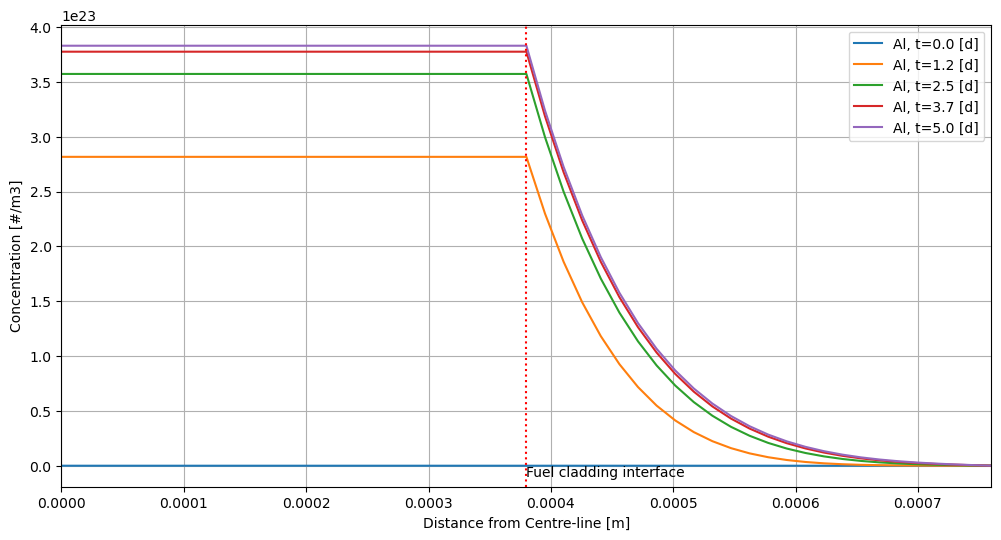

In [202]:
T_gas = 5*24*3600
N=100
M=267335

isotope = IsotopeDiffusionTemperature(M_Xe135,Lamb_Xe135,Y_Xe135, D_fuel, D_water_Xe135)
plot = isotope.plot_simulation(Temp_In, Temp_Out, T_gas, 'Xe135', Y_Xe135, matrix_thickness, D_fuel, M, N)

# Problem is and has always been the diffusion coefficient
## Determining diffusion coefficient Xenon based on ratio (see methodology)

Based on the ratio between the Xenons, a diffusion coefficient can be defined for the two under some assumptions as listed in the methodology.


We use here that the steady concentration at the boundary is constant and replenished, although in reality it decreases as isotopes are released faster than they fission and diffuse through the fuel. It is a good assumption though.


It is never going to be perfect as I have no way to determine the diffusion coefficient through the fuel itself, so I have to estimate this for the boundary concentration and the release rate is dependent on this. 

@Rudy if you are reading this, I now estimated the diffusion coefficient through the fuel to be way smaller than through the cladding because of the high density (and there is also some literature for diffusion through UO$_2$ which says it is low). However, there are also factors such as irradiation-induced and Radiation-enhanced diffusion that only play a role in the fuel. Is it reasonable to assume that the diffusion coefficient through the fuel is very small?

We will also need the measured ratio before we can say anything about the diffusion coefficient. For this, we are going to make one big assumption, namely that the decay rate in the water is equal to the release rate through the fuel. 

There is another assumption here: The release rate is calculated for a cladding thickness of 0.38 mm. This is not true everywhere. It can be a little shallower too, and on the outside rods of a FE, there are rods with a cladding thickness of 0.57mm. As this again places a lower limit for the diffusion coefficient, the calculated diffusion coefficient will still be the lower limit. 

To calculate the diffusion coefficient for the Xenon-Iodine combination by a ratio, I do not need surface size of the fuel rods as it is not about the total release rate, but rather how fast the Xenons can travel through the cladding. 



## Calculation of the Observed Xe-133/Xe-135 RatioCalculation of the Observed Xe-133/Xe-135 Ratio (See methodology)

In [28]:
# Data on isotopes in primary circuit in normal operation
Primary = pd.read_excel(r'/Users/imemeulenbelt/Desktop/Data/Excel data/Gamma Spectrometry meeting.xlsx')
#Primary = pd.read_excel(r'/Users/imemeulenbelt/Desktop/Data/Excel data/Used for Baseline/Edited Baseline data no zeros.xlsx')

# Setting Sample date time as index column
Primary['Sample Date-Time'] = pd.to_datetime(Primary['Sample Date-Time'], format='%Y/%m/%d %H:%M:%S')
Primary.set_index('Sample Date-Time', inplace=True)
# Assuming 'Primary' is your DataFrame
#Primary = Primary[Primary['Week in reactor period'] != 0]


# Drop some columns that aren't necessary
Primary.drop(columns=['Analysis Date-Time', 'Sample-Analysis time (hr aprox.)', 'Reactor start', 'Reactor stop', 'Detector used'], inplace=True)
#Primary.drop(columns=['Analysis Date-Time', 'Sample-Analysis time (hr aprox.)', 'Reactor start', 'Reactor stop', 'Sample ID','Unnamed: 45', 'Unnamed: 53','Baseline', 'Total', 'Average', 'Percentage', 'Total.1'], inplace=True)


def Ratio(Lamb_Xe135, Lamb_Xe133):
    # Group the DataFrame by 'Week in reactor period'
    grouped = Primary.groupby('Week')
    #grouped = Primary.groupby('Week in reactor period')

    # Define an empty dictionary to store the ratio for each week
    week_ratios = {}

    # Iterate over each group
    for name, group in grouped:
        # Skip if name is 0
        if name == 0:
            continue

        # Defining the measured activity for this group
        MAct_Xe133 = group['133Xe']
        MAct_Xe135 = group['135Xe']

        # Calculate the actual activity
        NAct_Xe133 = MAct_Xe133 / Lamb_Xe133 * 5.27*24/(20.8)
        NAct_Xe135 = MAct_Xe135  / Lamb_Xe135 *9.13/(6.68)

        # Create a boolean mask for nonzero values
        nonzero_mask_133 = NAct_Xe133 != 0
        nonzero_mask_135 = NAct_Xe135 != 0

        # Use logical AND operation to create a final mask where both are nonzero
        final_mask = np.logical_and(nonzero_mask_133, nonzero_mask_135)

        # Use the final mask to compute Ratio_Measured
        if np.any(final_mask):
            Ratio_Measured = np.average(NAct_Xe133[final_mask] / NAct_Xe135[final_mask])
            week_ratios[name] = Ratio_Measured

    return week_ratios

week_ratios = Ratio(Lamb_Xe135, Lamb_Xe133)
print(week_ratios)


{1: 15.050297470667422, 2: 27.96850105695465, 3: 35.64455115231801, 4: 43.08838125480083}


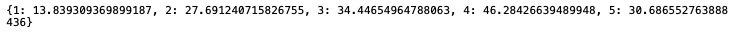

# The Computed Xe-133/Xe-135 Ratio (see methodology)

In [38]:
import numpy as np
import matplotlib.pyplot as plt

class RatioCalculation:
    def __init__(self, Lamb_Xe133, Lamb_Xe135,  M, N, Temp_In, Temp_Out):
        self.Lamb_Xe133 = Lamb_Xe133                 # Decay constants
        self.Lamb_Xe135 = Lamb_Xe135                 # Decay constants
        #self.T_gas = T_gas
        self.M = M
        self.N = N
        self.Temp_In = Temp_In
        self.Temp_Out = Temp_Out


    def Finite_difference_scheme_gasses(self, M, N, Lamb, Temp_In, Temp_Out, steady_concentration, D_clad):
        A = 1  # Area
        R = 8.314e-3                                     # Gas constant in kJ/(mol*K)

        L = 0.00038                                       # Half-width of the fuel
        M_gas = M


        N_total = N     # Total number of spatial steps

        dx = L / N_total                           # Spatial step size
        dt = self.T_gas / M_gas                           # Time step size


        u = np.zeros((N+1, M+1))
        u[0, :] = steady_concentration 

        R_t = np.zeros(M+1)
        x = np.linspace(0, L, N+1)

        
        D = D_clad
    
        # Check the stability condition within the loop after D is calculated
        if D * dt / dx**2 > 0.5:
            # Possible values for N and M to satisfy the stability condition
            N_option1, M_option1 = int(D * self.T_gas / dx**2 * 2), M
            N_option2, M_option2 = N, int(D * self.T_gas / dx**2 * 2)
            N_option3, M_option3 = int(D * self.T_gas / dx**2), int(D * self.T_gas / dx**2)
            print(f"Stability condition not satisfied. Change N or M to such that it is met. "
                  f"Examples that are possible with this diffusion coefficient are: "
                  f"N={N_option1}, M={M_option1}; "
                  f"N={N_option2}, M={M_option2}; "
                  f"N={N_option3}, M={M_option3}")
            return
        
        for j in range(M):
            for i in range(1, N):
                
                u[i, j+1] = u[i, j] + D * dt / dx**2 * (u[i+1, j] - 2*u[i, j] + u[i-1, j]) - Lamb * dt * u[i, j]
            
            u[0, j+1] = steady_concentration #u[0, j]

            u[N, j+1] = u[N, j] + D * dt / dx * (u[N-1, j] - u[N, j]) - Lamb * u[N, j]

            dc_dx = (u[N-1, j] - u[N, j]) / dx
            J = -D * dc_dx
            A = 1
            R_t[j+1] = -J * A
            
        #t_gas = np.linspace(0, T_gas, M_gas+1)
        #plt.plot(t_gas/(24*3600), R_t, label='Al')
        #plt.xlabel('Time [d]')
        #plt.ylabel('Unit release rate [m2]')
        #plt.title('Release rate through aluminum')
        #plt.grid()
        #plt.legend()
        return u, R_t[-1]


    def ratio_calculation(self, df, D_clad_range, week_ratios):
        optimal_D_clad_per_week = {}
        optimal_D_clad_per_week_smaller_Xe135 = {}  # New dictionary for smaller Xe-135 concentration

        df['Week in reactor period'] = (df.index // 7).astype(int)

        # Calculate the weeks in your dataset
        weeks = list(week_ratios.keys())

        # Create a color map to give each week a different color
        color_map = plt.cm.get_cmap('jet', len(weeks))

        # Create a figure
        plt.figure(figsize=(10, 6))

        for week, Actual_Ratio in week_ratios.items():
            ratios_per_day = []
            optimal_D_clad_per_day = []
            optimal_D_clad_per_day_smaller_Xe135 = []  # New list for smaller Xe-135 concentration

            df_week = df[df['Week in reactor period'] == week]
            
            for index, row in df_week.iterrows():
                Xe133_data = row['Xe133']
                Xe135_data = row['Xe135']
                Xe135_data_smaller = Xe135_data / 10  # 10 times smaller concentration
                self.T_gas = index * 24 * 3600

                print('Now working on day', index)

                ratios = []
                ratios_smaller_Xe135 = []  # To store ratios for smaller Xe-135 concentration

                for D_clad in D_clad_range:
                    _, boundary_Xe133 = self.Finite_difference_scheme_gasses(
                        M=self.M, N=self.N, Lamb=self.Lamb_Xe133, Temp_In=self.Temp_In, Temp_Out=self.Temp_Out,
                        steady_concentration=Xe133_data, D_clad=D_clad)

                    _, boundary_Xe135 = self.Finite_difference_scheme_gasses(
                        M=self.M, N=self.N, Lamb=self.Lamb_Xe135, Temp_In=self.Temp_In, Temp_Out=self.Temp_Out,
                        steady_concentration=Xe135_data, D_clad=D_clad)

                    _, boundary_Xe135_smaller = self.Finite_difference_scheme_gasses(
                        M=self.M, N=self.N, Lamb=self.Lamb_Xe135, Temp_In=self.Temp_In, Temp_Out=self.Temp_Out,
                        steady_concentration=Xe135_data_smaller, D_clad=D_clad)  # Using smaller concentration

                    ratio = boundary_Xe133 / (boundary_Xe135)
                    ratio_smaller_Xe135 = boundary_Xe133 / (boundary_Xe135_smaller)  # Ratio for smaller concentration

                    ratios.append(ratio)
                    ratios_smaller_Xe135.append(ratio_smaller_Xe135)  # Append to the new list

                diff = [abs(r - Actual_Ratio) for r in ratios]
                optimal_D_clad = D_clad_range[diff.index(min(diff))]

                diff_smaller_Xe135 = [abs(r - Actual_Ratio) for r in ratios_smaller_Xe135]
                optimal_D_clad_smaller_Xe135 = D_clad_range[diff_smaller_Xe135.index(min(diff_smaller_Xe135))]  # New optimal D_clad for smaller Xe-135

                optimal_D_clad_per_day.append(optimal_D_clad)
                optimal_D_clad_per_day_smaller_Xe135.append(optimal_D_clad_smaller_Xe135)  # Append to the new list

                # Plotting part for each day within the week
                plt.plot(D_clad_range, ratios, color=color_map(week), label=f'Week {week}, day {index}')
                plt.scatter(optimal_D_clad, Actual_Ratio, color=color_map(week), label=f'Optimal D for week {week}, day {index}')
                plt.axhline(y=Actual_Ratio, color=color_map(week), linestyle='--')

                # Plotting for smaller Xe-135 concentration
                plt.plot(D_clad_range, ratios_smaller_Xe135, color=color_map(week), linestyle='dotted', label=f'Week {week}, day {index} (smaller Xe-135)')
                plt.scatter(optimal_D_clad_smaller_Xe135, Actual_Ratio, color=color_map(week), marker='x', label=f'Optimal D for week {week}, day {index} (smaller Xe-135)')

            optimal_D_clad_per_week[week] = optimal_D_clad_per_day
            optimal_D_clad_per_week_smaller_Xe135[week] = optimal_D_clad_per_day_smaller_Xe135  # Store in the new dictionary


        # Plot settings and display
        plt.xscale('log')
        plt.xlabel('Diffusion Coefficient [m^2/s]')
        plt.ylabel('Xe-133/Xe-135 Ratio')
        plt.title('Xe-133/Xe-135 ratio vs Diffusion Coefficient')
        plt.legend()
        plt.grid(True)
        plt.show()

        print(f'Optimal diffusion coefficients: {optimal_D_clad_per_week}')

        return optimal_D_clad_per_week, optimal_D_clad_per_week_smaller_Xe135  # Return both dictionaries




In [44]:
class RatioCalculation:
    def __init__(self, Lamb_Xe133, Lamb_Xe135,  M, N, Temp_In, Temp_Out):
        self.Lamb_Xe133 = Lamb_Xe133                 # Decay constants
        self.Lamb_Xe135 = Lamb_Xe135                 # Decay constants
        #self.T_gas = T_gas
        self.M = M
        self.N = N
        self.Temp_In = Temp_In
        self.Temp_Out = Temp_Out


    def Finite_difference_scheme_gasses(self, M, N, Lamb, Temp_In, Temp_Out, steady_concentration, D_clad):
        A = 1  # Area
        R = 8.314e-3                                     # Gas constant in kJ/(mol*K)

        L = 0.00038                                       # Half-width of the fuel
        M_gas = M


        N_total = N     # Total number of spatial steps

        dx = L / N_total                           # Spatial step size
        dt = self.T_gas / M_gas                           # Time step size


        u = np.zeros((N+1, M+1))
        u[0, :] = steady_concentration 

        R_t = np.zeros(M+1)
        x = np.linspace(0, L, N+1)

        
        D = D_clad
    
        # Check the stability condition within the loop after D is calculated
        if D * dt / dx**2 > 0.5:
            # Possible values for N and M to satisfy the stability condition
            N_option1, M_option1 = int(D * self.T_gas / dx**2 * 2), M
            N_option2, M_option2 = N, int(D * self.T_gas / dx**2 * 2)
            N_option3, M_option3 = int(D * self.T_gas / dx**2), int(D * self.T_gas / dx**2)
            print(f"Stability condition not satisfied. Change N or M to such that it is met. "
                  f"Examples that are possible with this diffusion coefficient are: "
                  f"N={N_option1}, M={M_option1}; "
                  f"N={N_option2}, M={M_option2}; "
                  f"N={N_option3}, M={M_option3}")
            return
        
        for j in range(M):
            for i in range(1, N):
                
                u[i, j+1] = u[i, j] + D * dt / dx**2 * (u[i+1, j] - 2*u[i, j] + u[i-1, j]) - Lamb * dt * u[i, j]
            
            u[0, j+1] = steady_concentration #u[0, j]

            u[N, j+1] = u[N, j] + D * dt / dx * (u[N-1, j] - u[N, j]) - Lamb * u[N, j]

            dc_dx = (u[N-1, j] - u[N, j]) / dx
            J = -D * dc_dx
            A = 1
            R_t[j+1] = -J * A
            
        #t_gas = np.linspace(0, T_gas, M_gas+1)
        #plt.plot(t_gas/(24*3600), R_t, label='Al')
        #plt.xlabel('Time [d]')
        #plt.ylabel('Unit release rate [m2]')
        #plt.title('Release rate through aluminum')
        #plt.grid()
        #plt.legend()
        return u, R_t[-1]


    def ratio_calculation(self, df, D_clad_range, week_ratios):
        optimal_D_clad_per_week = {}
        df['Week in reactor period'] = (df.index // 7).astype(int)

        # Calculate the weeks in your dataset
        weeks = list(week_ratios.keys())

        # Create a color map to give each week a different color
        color_map = plt.cm.get_cmap('jet', len(weeks))

        # Create a figure
        plt.figure(figsize=(10, 6))

        for week, Actual_Ratio in week_ratios.items():
            ratios_per_day = []
            optimal_D_clad_per_day = []

            df_week = df[df['Week in reactor period'] == week]

            for index, row in df_week.iterrows():
                Xe133_data = row['Xe133']
                Xe135_data = row['Xe135']
                self.T_gas = index * 24 * 3600

                print('Now working on day', index)

                ratios = []
                for D_clad in D_clad_range:
                    _, boundary_Xe133 = self.Finite_difference_scheme_gasses(
                        M=self.M, N=self.N, Lamb=self.Lamb_Xe133, Temp_In=self.Temp_In, Temp_Out=self.Temp_Out,
                        steady_concentration=Xe133_data, D_clad=D_clad)

                    _, boundary_Xe135 = self.Finite_difference_scheme_gasses(
                        M=self.M, N=self.N, Lamb=self.Lamb_Xe135, Temp_In=self.Temp_In, Temp_Out=self.Temp_Out,
                        steady_concentration=Xe135_data, D_clad=D_clad)

                    ratio = boundary_Xe133/ (boundary_Xe135) # Times Lamb to account for activity
                    ratios.append(ratio)

                diff = [abs(r - Actual_Ratio) for r in ratios]
                optimal_D_clad = D_clad_range[diff.index(min(diff))]

                ratios_per_day.append(ratios)
                optimal_D_clad_per_day.append(optimal_D_clad)
                
                # Plotting part for each day within the week
                plt.plot(D_clad_range, ratios, color=color_map(week), label=f'Week {week}, day {index}')
                plt.scatter(optimal_D_clad, Actual_Ratio, color=color_map(week), label=f'Optimal D for week {week}, day {index}')
                plt.axhline(y=Actual_Ratio, color=color_map(week), linestyle='--')

            optimal_D_clad_per_week[week] = optimal_D_clad_per_day

        # Plot settings and display
        plt.xscale('log')
        plt.xlabel('Diffusion Coefficient [m^2/s]')
        plt.ylabel('Xe-133/Xe-135 Ratio')
        plt.title('Xe-133/Xe-135 ratio vs Diffusion Coefficient')
        plt.legend()
        plt.grid(True)
        plt.show()

        print(f'Optimal diffusion coefficients: {optimal_D_clad_per_week}')

        return optimal_D_clad_per_week

# Finding the Diffusion Coefficient of Xenon + Iodine (see methodology)

In [45]:
1e-12*(35*24*3500)/150000 /(0.00038/50)**2

0.33933518005540164

[1.00000000e-13 1.01793188e-13 1.03618532e-13 1.05476608e-13
 1.07368002e-13 1.09293313e-13 1.11253148e-13 1.13248126e-13
 1.15278878e-13 1.17346046e-13 1.19450282e-13 1.21592250e-13
 1.23772629e-13 1.25992105e-13 1.28251381e-13 1.30551170e-13
 1.32892198e-13 1.35275206e-13 1.37700945e-13 1.40170183e-13
 1.42683698e-13 1.45242286e-13 1.47846753e-13 1.50497924e-13
 1.53196636e-13 1.55943740e-13 1.58740105e-13 1.61586614e-13
 1.64484167e-13 1.67433678e-13 1.70436079e-13 1.73492319e-13
 1.76603364e-13 1.79770195e-13 1.82993813e-13 1.86275237e-13
 1.89615503e-13 1.93015666e-13 1.96476801e-13 2.00000000e-13]
Now working on day 7
Now working on day 14
Now working on day 21
Now working on day 28


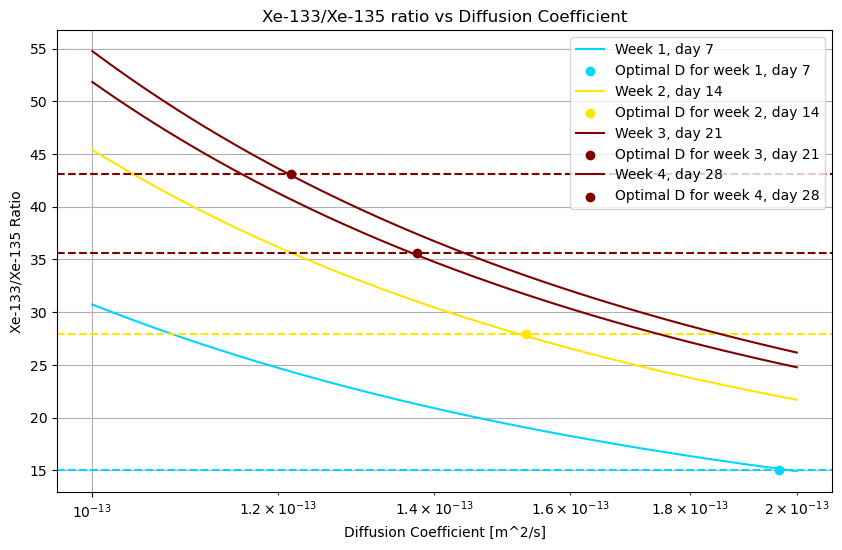

Optimal diffusion coefficients: {1: [1.9647680073425306e-13], 2: [1.531966357335973e-13], 3: [1.3770094511942716e-13], 4: [1.2159225036075086e-13]}


In [51]:
N=40
M=100000
# Create an instance of the class
ratio_calc = RatioCalculation(Lamb_Xe133, Lamb_Xe135, M, N, Temp_In, Temp_Out)

# Range of diffusion coefficients to try

# Calculate the logarithm (base 10) of the ending value
log_end = np.log10(2e-13)

D_clad_range = np.logspace(-13, log_end, num=40)  # For example

print(D_clad_range)
# Actual ratio of Xenon-133 and Xenon-135
Actual_Ratio = week_ratios

optimal_D_clad = ratio_calc.ratio_calculation(df, D_clad_range, Actual_Ratio)


In [41]:
print(optimal_D_clad)

({1: [2.0971756515126088e-13], 2: [1.466048571099111e-13], 3: [1.2257591252232825e-13], 4: [1.2257591252232825e-13]}, {1: [3.0000000000000014e-13], 2: [3.0000000000000014e-13], 3: [3.0000000000000014e-13], 4: [3.0000000000000014e-13]})


With this we find thus the average diffusion coefficient of the Iodine and Xenon combination as

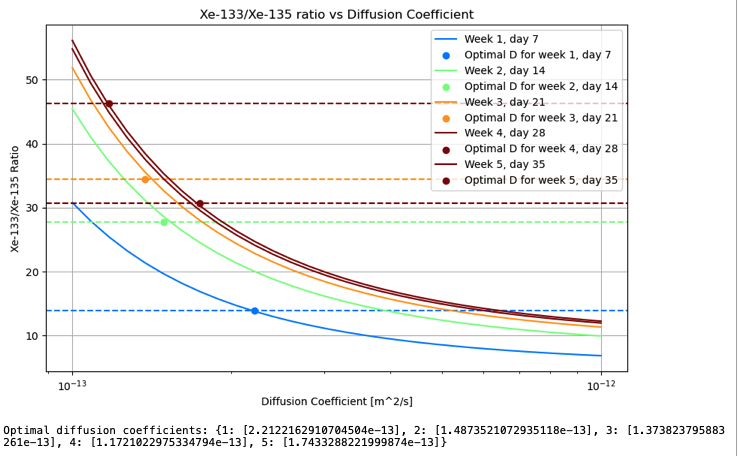

In [137]:
# Get a list of all the values, excluding the one for day 35
all_values = [value for week, sublist in optimal_D_clad.items() for i, value in enumerate(sublist) if not (week == 5 and i == 0) ]

# Calculate the average
D_XeI = np.average(all_values)

print('The diffusion coefficient for the combination of Xenon and Iodine is ', D_XeI)


The diffusion coefficient for the combination of Xenon and Iodine is  1.522416579870071e-13


1.5613736229451758e-13
Here I do not use the values of week 5, as in some measurements the reactor might already have been shut off. 

### Conclusion

We see from this that the actual diffusion coefficient for the combination of the Xenons and their Iodine precursor is 1.53900723203032e-13. This is a factor of magnitude larger than the theoretical concentration driven diffusion coefficient for just Xenon, let alone the combination with less volatile Iodine. As a Combined diffusion coefficient is the weighted average of two diffusion coefficients, we now know that :

\begin{equation}
    D_C = \frac{t_{1/2, Xe}* D_{Xe} + t_{1/2, I}*D_{I}}{t_{1/2, Xe} + t_{1/2, I}}
\end{equation}

With $D_C$ the calculated diffusion coefficient

If we assume that Xenon and Krypton follow a Einstein-Stokes type relation and we can calculate the measured diffusion coefficient for Krypton, we could determine which part of the Xenon diffusion coefficient is accounted for by the Iodine. The presence of an offgas system makes it near impossible to be sure of the release rate of Krypton. 
So first we would have to calculate what the off-gas system takes out of the system. This can be done with the just determined diffusion coefficient for Xenon, the surface size of the fuel rods and the measured activity. Using this we can fit an exponential function of the half life that should be able to always give us the off gassing factor. 

# Estimating the off-gas fraction

In [54]:
def Finite_difference_scheme_gasses(M, N, Lamb, D, steady_concentration):
    A = 47.5  # Area
    R = 8.314e-3                                     # Gas constant in kJ/(mol*K)
    L = 0.00038                                      # Half-width of the fuel
    M_gas = M
    T_gas = 35*3600*24
    L_total = L 

    N_total = N     # Total number of spatial steps

    dx = L_total / N_total                           # Spatial step size
    dt = T_gas / M_gas                           # Time step size


    u = np.zeros((N+1, M+1))
    u[0, :] = steady_concentration 

    R_t = np.zeros(M+1)

    x = np.linspace(0, L, N+1)

    for j in range(M):
        for i in range(1, N):

            # Check the stability condition within the loop after D is calculated
            if D * dt / dx**2 > 0.5:
                # Possible values for N and M to satisfy the stability condition
                N_option1, M_option1 = int(D * T_gas / dx**2 * 2), M
                N_option2, M_option2 = N, int(D * T_gas / dx**2 * 2)
                N_option3, M_option3 = int(D * T_gas / dx**2), int(D * T_gas / dx**2)
                print(f"Stability condition not satisfied. Change N or M to such that it is met. "
                      f"Examples that are possible with this diffusion coefficient are: "
                      f"N={N_option1}, M={M_option1}; "
                      f"N={N_option2}, M={M_option2}; "
                      f"N={N_option3}, M={M_option3}")
                return

            u[i, j+1] = u[i, j] + D * dt / dx**2 * (u[i+1, j] - 2*u[i, j] + u[i-1, j]) - Lamb * dt * u[i, j]

        u[0, j+1] = u[0, j]

        #D = 3e-12#self.D_func(Temp_Out) * np.sqrt(M_H2 / self.M_Isotope)
        u[N, j+1] = u[N, j] + D * dt / dx * (u[N-1, j] - u[N, j]) - Lamb * u[N, j]

        dc_dx = (u[N-1, j] - u[N, j]) / dx
        J = -D * dc_dx
        A = 1
        R_t[j+1] = -J * A

    #t_gas = np.linspace(0, T_gas, M_gas+1)
    #plt.plot(t_gas/(24*3600), R_t, label='Al')
    #plt.xlabel('Time [d]')
    #plt.ylabel('Unit release rate [m2]')
    #plt.title('Release rate through aluminum')
    #plt.grid()
    #plt.legend()
    return u, R_t[-1]



### First calculating the release rate for the Xenons

Gives us an indication how much of the Xenon is taken out by the off-gas system. With this, we can calculate the diffusion coefficient of Krypton. Using the diffusion coefficient for Krypton, we can then in turn calculate which part of the diffusion coefficient of Xenon and Iodine combination can be ascribed to Iodine. This would give us an interesting 

For this we need the surface are ofthe fuel rods. There are 20 plates for each fuel assembly, and 33 fuel assemblies. The dimensions of the fuel meat are approximately 600x60mm meaning that we get 0.6 * 0.06 * 2 * 33 * 20 is approximately 47.5m2 of fuel size. 

This would account for an average release rate total of:
 

In [55]:
N = 100
M = 300000

_,Average_release_rate_Xe133 = Finite_difference_scheme_gasses(M, N, Lamb_Xe133, D_XeI, np.average(df['Xe133']) )


_,Average_release_rate_Xe135 = Finite_difference_scheme_gasses(M, N, Lamb_Xe135, D_XeI, np.average(df['Xe135']) )
                                        

In [56]:
Measured_release_rate_Xe133 = np.average(Primary['133Xe'])*110e3/(50e-3*Lamb_Xe133)
Measured_release_rate_Xe135 = np.average(Primary['135Xe'])*110e3/(50e-3*Lamb_Xe135)

Fraction_offgass_Xe133= Measured_release_rate_Xe133/Average_release_rate_Xe133

Fraction_offgass_Xe135= Measured_release_rate_Xe135/Average_release_rate_Xe135

# Known data
off_gassing_factor_Xe133 = Fraction_offgass_Xe133
half_life_Xe133 = 5.27*24*3600
off_gassing_factor_Xe135 = Fraction_offgass_Xe135
half_life_Xe135 = 9.13*3600

# Logarithmic transformation
log_off_gassing_factor_Xe133 = np.log(off_gassing_factor_Xe133)
log_off_gassing_factor_Xe135 = np.log(off_gassing_factor_Xe135)

# Formulate the system of linear equations and solve it
from scipy.linalg import solve

A = np.array([[1, half_life_Xe133], [1, half_life_Xe135]])
b = np.array([log_off_gassing_factor_Xe133, log_off_gassing_factor_Xe135])

log_a, b = solve(A, b)

# Retrieve the original a parameter
a = np.exp(log_a)


def Fraction_offgass(a, b, half_life):
    return a * np.exp(b * half_life)

# Now we can predict the off-gassing factor for Kr-85m
half_life_Kr85m = 16906.028794145008
Fraction_offgass_Kr85m = a * np.exp(b * half_life_Kr85m)
Fraction_offgass_Kr85m

0.8163989792984009

In [58]:
print('the pre-exponential coefficient is ',a, 'and the exponential coefficient is', b)
print('This is based on an off gassing factor for Xe-133 of', np.round(Fraction_offgass_Xe133,3), 'And for Xe-135', np.round(Fraction_offgass_Xe135,3))

the pre-exponential coefficient is  0.8631877608800794 and the exponential coefficient is -3.2964012458195383e-06
This is based on an off gassing factor for Xe-133 of 0.192 And for Xe-135 0.775


Above we calculated the off-gas fraction of different isotopes as a function of half life.

Discussion point:
We know that a is supposed to be 1 if it was exact, as this would mean that nothing is off gassed for a half life of 0. However, seeing that it is close to one gives me some confidence in the result. 
Does not take into account solubility either...

Using what percentage remains due to the offgassing, I can calculate the actual release rate for Kr85m based on data. I can do that like this:

In [125]:
# Replace zeros with 10 in Primary['85mKr']
Primary['85mKr'] = [x if x != 0 else 5 for x in Primary['85mKr']]

Release_Kr85m = (Primary['85mKr'])*110e3/(50e-3*Lamb_Kr85m*Fraction_offgass_Kr85m) # Using measured data 

Actual_Release_Rate_Kr85m = sum(n for n in Release_Kr85m if n != 0) / len([n for n in Release_Kr85m if n != 0])

Actual_Release_Rate_Kr85m

1020235182267.7133

In [126]:
import numpy as np
import matplotlib.pyplot as plt

class ReleaseCalculation:
    def __init__(self, Lamb_Kr85m, M, N):
        self.Lamb_Kr85m = Lamb_Kr85m                 # Decay constants
        self.M = M
        self.N = N



    def Finite_difference_scheme_gasses(self, M, N, Lamb, steady_concentration, D_clad):
        A = 47.5  # Area
        R = 8.314e-3                                     # Gas constant in kJ/(mol*K)

        M_H2 = 4                                         # Hydrogen mass

        L = 0.00038                                      # Half-width of the fuel
        M_gas = M


        N_total = N     # Total number of spatial steps

        dx = L / N_total                           # Spatial step size
        dt = self.T_gas / M_gas                           # Time step size


        u = np.zeros((N+1, M+1))
        u[0, :] = steady_concentration 

        R_t = np.zeros(M+1)
        x = np.linspace(0, L, N+1)

        
        D = D_clad
    
        # Check the stability condition within the loop after D is calculated
        if D * dt / dx**2 > 0.5:
            # Possible values for N and M to satisfy the stability condition
            N_option1, M_option1 = int(D * self.T_gas / dx**2 * 2), M
            N_option2, M_option2 = N, int(D * self.T_gas / dx**2 * 2)
            N_option3, M_option3 = int(D * self.T_gas / dx**2), int(D * self.T_gas / dx**2)
            print(f"Stability condition not satisfied. Change N or M to such that it is met. "
                  f"Examples that are possible with this diffusion coefficient are: "
                  f"N={N_option1}, M={M_option1}; "
                  f"N={N_option2}, M={M_option2}; "
                  f"N={N_option3}, M={M_option3}")
            return
        
        for j in range(M):
            for i in range(1, N):
                
                u[i, j+1] = u[i, j] + D * dt / dx**2 * (u[i+1, j] - 2*u[i, j] + u[i-1, j]) - Lamb * dt * u[i, j]
            
            u[0, j+1] = steady_concentration #u[0, j]

            u[N, j+1] = u[N, j] + D * dt / dx * (u[N-1, j] - u[N, j]) - Lamb * u[N, j]

            dc_dx = (u[N-1, j] - u[N, j]) / dx
            J = -D * dc_dx
            A = 1
            R_t[j+1] = -J * A
            
        #t_gas = np.linspace(0, T_gas, M_gas+1)
        #plt.plot(t_gas/(24*3600), R_t, label='Al')
        #plt.xlabel('Time [d]')
        #plt.ylabel('Unit release rate [m2]')
        #plt.title('Release rate through aluminum')
        #plt.grid()
        #plt.legend()
        return u, R_t[-1]

    
    def release_rate_calculation(self, df, D_clad_range, Actual_Release_Rate):
        # Fetch the row corresponding to the 14th day
        row = df.loc[14]
        Kr85m_data = row['Kr85m']
        self.T_gas = 14 * 24 * 3600  # Convert 14 days to seconds

        release_rates = []
        for D_clad in D_clad_range:
            _, boundary_Kr85m = self.Finite_difference_scheme_gasses(
                M=self.M, N=self.N, Lamb=self.Lamb_Kr85m,
                steady_concentration=Kr85m_data, D_clad=D_clad)

            release_rate = boundary_Kr85m
            release_rates.append(release_rate)

        # Find the diffusion coefficient for which the calculated release rate is closest to the actual release rate
        diff = [abs(r - Actual_Release_Rate) for r in release_rates]
        optimal_D_clad = D_clad_range[diff.index(min(diff))]
        
        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.plot(D_clad_range, release_rates, label='Calculated release rate for 14 days')
        plt.axhline(y=Actual_Release_Rate, color='r', linestyle='--', label='Actual release rate')
        plt.scatter(optimal_D_clad, Actual_Release_Rate, label=f'Optimal diffusion coefficient for 14 days')
        plt.xscale('log')
        plt.xlabel('Release Coefficient [m^2/s]')
        plt.ylabel('Kr85m Release Rate')
        #plt.title('Kr85m Release Rate vs Diffusion Coefficient')
        plt.legend()
        plt.grid(True)
        plt.show()

        print(f'Optimal diffusion coefficient: {optimal_D_clad}')

        return optimal_D_clad





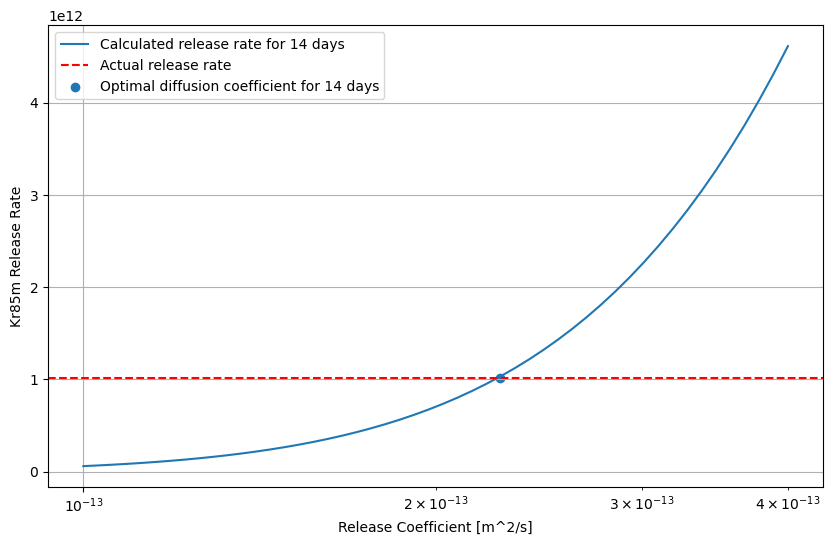

Optimal diffusion coefficient: 2.2715443441842974e-13


In [149]:
N=10
M=10000
end = np.log10(4e-13)
D_clad_range = np.logspace(-13, end, num=50)  
Release_calc = ReleaseCalculation(Lamb_Kr85m, M, N)
Kr85m_Diff = Release_calc.release_rate_calculation(df, D_clad_range, Actual_Release_Rate_Kr85m)

Result: we see that for each week this is the same. That is to be expected as Kr85m has already reached steady state in 7 days.

### Calculating the Iodine diffusion coefficient (see Methodology)

Still a problem is that this is much too dependent on neutronics! a factor 10 lower would mean a large difference. However, as a generalised case (i.e. everything average like burn-up and reactor height), this is the best I can do.

Now that I have this. I can use the following equation to calculate the Iodine diffusion coefficient through the fuel and cladding

\begin{equation}
    D_{P} = \frac{D_{comb}(t_{1/2,D}+t_{1/2,P})-t_{1/2,S}D_D}{t_{1/2,P}}
\end{equation}

Since I got that the diffusion coefficient of Krypton can best be estimated as 4.5e-12 based on the release of the whole reactor, I can use Grahams Law to calculate the diffusion coefficient for Xenon. This gives us 2.43e-13. Earlier on I got that the whole diffusion coefficient for the iodine and Xenon combination was 1.54e-13 and with that we can calculate the Iodine diffusion coefficient to be 3.46e-14 using Xe-135 and I-135. 

In [150]:
Kr85m_Diff_Coeff = np.average(Kr85m_Diff)#3.2903445623126713e-13#np.average(Kr85m_Diff)
Estimated_Diff_Coeff_Xe133 = Kr85m_Diff_Coeff * np.sqrt(85/133)
Estimated_Diff_Coeff_Xe135 = Kr85m_Diff_Coeff * np.sqrt(85/135)
t_half_Xe133= (5.27*24*3600)
t_half_Xe135= (9.13*3600)
t_half_average_Xe = (t_half_Xe133+t_half_Xe135)/2
t_half_I133 = (20.8*3600)
t_half_I135 = (6.68*3600)
t_half_average_I = (t_half_I133+t_half_I135)/2
t_half_average_Xe = (t_half_Xe133+t_half_Xe135)/2

#Diff_Coeff_IXe_Comb = np.average(optimal_D_clad)
Estimated_Diff_Coeff_I133 = (D_XeI*(t_half_Xe133 + t_half_I133) - t_half_Xe133*Estimated_Diff_Coeff_Xe133)/t_half_I133
Estimated_Diff_Coeff_I135 = (D_XeI*(t_half_Xe135 + t_half_I135) - t_half_Xe135*Estimated_Diff_Coeff_Xe135)/t_half_I135

Estimated_Diff_Coeff_I = (D_XeI*(t_half_average_Xe + t_half_average_I) - t_half_average_Xe*(Estimated_Diff_Coeff_Xe133))/t_half_average_I


In [151]:
print('The diffusion coefficient for the Xenon-Iodine combination through the cladding is', D_XeI )
print('The diffusion coefficient for Xe through the cladding is', Estimated_Diff_Coeff_Xe135)
print('The diffusion coefficient for Krypton through the cladding is', Kr85m_Diff_Coeff)
print('The diffusion coefficient for Iodine through the cladding is', Estimated_Diff_Coeff_I)

The diffusion coefficient for the Xenon-Iodine combination through the cladding is 1.5613736229451758e-13
The diffusion coefficient for Xe through the cladding is 1.8024523729170517e-13
The diffusion coefficient for Krypton through the cladding is 2.2715443441842974e-13
The diffusion coefficient for Iodine through the cladding is 3.050542836660607e-14


In [146]:
D_XeI = 1.5613736229451758e-13
Estimated_Diff_Coeff_Xe133= 2.429641869412771e-13
Kr85m_Diff_Coeff = 3.0391953823131946e-13
Estimated_Diff_Coeff_I= 3.993436553747745e-14

Here, I only use I-135 and Xe-135 as the answer for Xe-133 is negative due to the larger half life of Xe-133 and that D_XeI is both from Xe-135 and Xe-133, something we cannot get around since it is calculated with the ratio between the two isotopes, and both their half lifes are also dependent on the Iodine precursor half life. 

# Showing that in normal operation not much is released

Let us again calculate the release rates, but based on the diffusion coefficients that we found. 

In [130]:
import numpy as np
import matplotlib.pyplot as plt

class ReleaseRateCalculation:
    def __init__(self, M_Isotope, Lamb, T_gas):
        self.M_Isotope = M_Isotope       # Isotope mass
        self.Lamb = Lamb                 # Decay constant
        self.T_gas = T_gas
    

    def Finite_difference_scheme_gasses(self, M, N, Lamb, D, steady_concentration):
        A = 47.5  # Area
        R = 8.314e-3                                     # Gas constant in kJ/(mol*K)

        M_H2 = 4                                         # Hydrogen mass

        L = 0.00038                                      # Cladding thickness
        M_gas = M

        N_total = N     # Total number of spatial steps

        dx = L / N_total                           # Spatial step size
        dt = self.T_gas / M_gas                           # Time step size


        u = np.zeros((N+1, M+1))
        u[0, :] = steady_concentration 

        R_t = np.zeros(M+1)

        x = np.linspace(0, L, N+1)

        for j in range(M):
            for i in range(1, N):
                # Check the stability condition within the loop after D is calculated
                if D * dt / dx**2 > 0.5:
                    # Possible values for N and M to satisfy the stability condition
                    N_option1, M_option1 = int(D * self.T_gas / dx**2 * 2), M
                    N_option2, M_option2 = N, int(D * self.T_gas / dx**2 * 2)
                    N_option3, M_option3 = int(D * self.T_gas / dx**2), int(D * self.T_gas / dx**2)
                    print(f"Stability condition not satisfied. Change N or M to such that it is met. "
                          f"Examples that are possible with this diffusion coefficient are: "
                          f"N={N_option1}, M={M_option1}; "
                          f"N={N_option2}, M={M_option2}; "
                          f"N={N_option3}, M={M_option3}")
                    return
                
                u[i, j+1] = u[i, j] + D * dt / dx**2 * (u[i+1, j] - 2*u[i, j] + u[i-1, j]) - self.Lamb * dt * u[i, j]
            
            u[0, j+1] = u[0, j]

            u[N, j+1] = u[N, j] + D * dt / dx * (u[N-1, j] - u[N, j]) - self.Lamb * u[N, j]

            dc_dx = (u[N-1, j] - u[N, j]) / dx
            J = -D * dc_dx
            A = 1
            R_t[j+1] = -J * A
            
        #t_gas = np.linspace(0, T_gas, M_gas+1)
        #plt.plot(t_gas/(24*3600), R_t, label='Al')
        #plt.xlabel('Time [d]')
        #plt.ylabel('Unit release rate [m2]')
        #plt.title('Release rate through aluminum')
        #plt.grid()
        #plt.legend()
        return u, R_t[-1]



In [254]:


# Other products
def Effective_lamb(t_half_p, t_half_d):
    Lamb_p = np.log(2)/(t_half_p * 24 * 3600) # In days
    Lamb_d = np.log(2)/(t_half_d * 24 * 3600) # In days
    return (Lamb_p * Lamb_d)/(Lamb_p + Lamb_d)

def Effective_diffusion_coeff(t_half_p, D_p, t_half_d, D_d):
    Weight = t_half_p+t_half_d
    D1 = t_half_p*D_p
    D2 = t_half_d*D_d
    return (D1+D2)/Weight


# Gaseous, Diffusion coeff extrapolated from https://www.engineeringtoolbox.com/diffusion-coefficients-d_1404.html
M_Kr85m,  Lamb_Kr85m,  D_water_Kr85m,  Y_Kr85m = 85,   0.41e-4,                          2.8E-9,         0.015
M_Kr87,   Lamb_Kr88,   D_water_Kr88,   Y_Kr88  = 88,   np.log(2)/(2.77*3600),            2.8E-9,         0.037 
M_Kr88,   Lamb_Kr87,   D_water_Kr87,   Y_Kr87  = 87,   1.5e-4,                           2.8E-9,         0.027 
M_Xe133,  Lamb_Xe133,  D_water_Xe133,  Y_Xe133 = 133,  Effective_lamb(20.8/24, 5.27),    2.2E-9,         0.065
M_Xe135,  Lamb_Xe135,  D_water_Xe135,  Y_Xe135 = 135,  Effective_lamb(6.68/24, 9.13/24), 2.2E-9,         0.062
M_Xe138,  Lamb_Xe138,  D_water_Xe138,  Y_Xe138 = 138,  np.log(2) / (14.08 * 60),         2.2E-9,         0.055 

    
# Volatile and daughters   Iodine is very soluble and very volatile in the fuel
M_Y91m,   Lamb_Y91m,   D_Water_Y91m,   Y_Y91m  = 91,   Effective_lamb(9.7/24,51/(60*24)),      Effective_diffusion_coeff(9.7/24, 1e-9,51/(60*24) , 1e-10),    0.024
M_Sr91,   Lamb_Sr91,   D_Water_Sr91,   Y_Sr91  = 91,   np.log(2)/(9.7*3600),                   6e-10,                                                          0.059
M_Sr92,   Lamb_Sr92,   D_Water_Sr92,   Y_Sr92  = 92,   np.log(2)/(2.7*3600),                   6e-10,                                                          0.061
M_Nb97,   Lamb_Nb97,   D_Water_Nb97,   Y_Nb97  = 97,   Effective_lamb(17/24, 72.1/(60*24)),    Effective_diffusion_coeff(17/24, 1e-9, 72.1/(60*24) , 1e-10),  0.062
M_Zr97,   Lamb_Zr97,   D_Water_Zr97,   Y_Zr97  = 97,   np.log(2)/(17*3600),                    8e-10,                                                         0.062
#M_Tc99m,   Lamb_Tc99m,   D_Water_Tc99m,   Y_Tc99m  = 99,   Effective_lamb(17/24, 72.1/(60*24)),    Effective_diffusion_coeff(17/24, 6e-9, 72.1/(60*24) , 1e-10),  0.062
M_Ru103,  Lamb_Ru103,  D_Water_Ru103,  Y_Ru103 = 103,  np.log(2)/(41*24*3600),                 6e-10                                                       ,  0.029
M_Ru106,  Lamb_Ru106,  D_Water_Ru106,  Y_Ru106 = 106,  np.log(2)/(1*365*24*3600)             , 6e-10,                                                         0.0038                                                

M_I131,   Lamb_I131,   D_Water_I131,   Y_I131  = 131,  np.log(2)/(8.05*24*3600),               1.95e-9,                                                       0.029 # upper = 2.8, lower = 1https://jcsp.org.pk/PublishedVersion/a0722532-789a-420b-9a5c-e5c5843ec3ebManuscript%20no%204,%20Final%20Gally%20Proof%20of%2010402%20(Mahboob%20Mohammad).pdf
M_I132,   Lamb_I132,   D_Water_I132,   Y_I132  = 132,  np.log(2)/(2.4*60),                     1.95e-9,                                                       0.044
M_I133,   Lamb_I133,   D_Water_I133,   Y_I133  = 133,  np.log(2)/(30.8*3600),                  1.95e-9,                                                       0.065
M_I134,   Lamb_I134,   D_Water_I134,   Y_I134  = 134,  np.log(2)/(52.5*60),                    1.95e-9,                                                       0.076
M_I135,   Lamb_I135,   D_Water_I135,   Y_I135  = 135,  np.log(2)/(6.68*3600),                  1.95e-9,                                                       0.059
M_Cs138,  Lamb_Cs138,  D_Water_Cs138,  Y_Cs138 = 138,  Effective_lamb(17/(60*24), 32/(60*24)), 2.056e-9,                                                      0.058
M_Ba139,  Lamb_Ba139,  D_Water_Ba139,  Y_Ba139 = 139,  np.log(2)/(85*60),                      6e-10,                                                          0.06
#M_Ce139,  Lamb_Ce139,  D_Water_Ce139,  Y_Ce139 = 139, 
M_Ba140,  Lamb_Ba140,  D_Water_Ba140,  Y_Ba140 = 140,  np.log(2)/(12.8*24*3600),               6e-10,                                                          0.063
M_Ce141,  Lamb_Ce141,  D_Water_Ce141,  Y_Ce141 = 141,  Effective_lamb(3.7/(24), 32),           6e-10,                                                          0.06
M_Ce143,  Lamb_Ce143,  D_Water_Ce143,  Y_Ce143 = 143,  np.log(2)/(32*3600),                    6e-10,                                                          0.062

M_La140,  Lamb_La140, D_water_La140, Y_La140 = 140, Effective_lamb(12.75, 1.68), 6.2e-10, 0.063 #m2/s
M_Cs137,  Lamb_Cs137,  D_water_Cs137, Y_Cs137 = 137, np.log(2)/(30*365*3600*24), 2.056e-9, 0.059#9e-10#6e-12 #2.056e-9#6e-12

#Others not before measured isotopes
M_Br84, Lamb_Br84, D_water_Br84, Y_Br84 = 84, np.log(2)/(30*60), 6e-10 , 0.011
M_Rb88, Lamb_Rb88, D_water_Rb88, Y_Rb88 = 88, Effective_lamb(2.77/(24), 17.8/(60*24)),6e-10 ,0.037
M_Sr89, Lamb_Sr89, D_water_Sr89, Y_Sr89 = 89, np.log(2)/(54*24*3600),6e-10 ,0.048
M_Y92, Lamb_Y92, D_water_Y92, Y_Y92     = 92, Effective_lamb(2.7/(24), 3.6/(24)), 6e-10,0.061
M_Sr93, Lamb_Sr93, D_water_Sr93, Y_Sr93 = 93, np.log(2)/(7*60), 6e-10, 0.065
M_Te131, Lamb_Te131, D_water_Te131, Y_Te131 = 131, Effective_lamb(21/(60*24), 24.8/(60*24)), 6e-10,0.029
M_Te132, Lamb_Te132, D_water_Te132, Y_Te132 = 132, np.log(2)/(77*3600), 6e-10,0.044
M_Ce144, Lamb_Ce144, D_water_Ce144, Y_Ce144 = 144, np.log(2)/(290*24*3600), 6e-10,0.061

M_Kr85, Lamb_Kr85, D_water_Kr85, Y_Kr85 = 85, np.log(2)/(10.27*365*24*3600), 2.8e-9, 0.003
M_Kr89, Lamb_Kr89, D_water_Kr89, Y_Kr89 = 89, np.log(2)/(3.18*60), 2.8e-9, 0.046
M_Rb89, Lamb_Rb89, D_water_Rb89, Y_Rb89 =89, np.log(2)/(15.4*60), 6e-10, 0.048
M_Y91, Lamb_Y91, D_water_Y91, Y_Y91 = 91, np.log(2)/(58*24*3600), 6e-10, 0.059
M_Y93, Lamb_Y93, D_water_Y93, Y_Y93 = 93, np.log(2)/(10*3600), 6e-10, 0.065
M_Y94, Lamb_Y94, D_water_Y94, Y_Y94 = 94, np.log(2)/(16.5*60), 6e-10, 0.065
M_Zr95, Lamb_Zr95, D_water_Zr95, Y_Zr95 = 95, np.log(2)/(63*24*3600), 8e-10, 0.064
M_Nb95, Lamb_Nb95, D_water_Nb95, Y_Nb95 = 95, Effective_lamb(63, 35), Effective_diffusion_coeff(63, 8e-10, 35 , 1e-10),0.062
M_Ru105, Lamb_Ru105, D_water_Ru105, Y_Ru105 = 105, np.log(2)/(4.5*60), 6e-10, 0.009
M_Rh105, Lamb_Rh105, D_water_Rh105, Y_Rh105 = 105, Effective_lamb(4.5/24, 36.5/24) , 6e-10, 0.009
M_Te129, Lamb_Te129, D_water_Te129, Y_Te129 = 129, Effective_lamb(4.6/24, 72/(60*24)), 6e-10, 0.01
M_Xe131m, Lamb_Xe131m, D_water_Xe131m, Y_Xe131m = 131, Effective_lamb(8.05, 12), Effective_diffusion_coeff(8.05, 1.95e-9, 12 , 2.2E-9), 0.0003
M_Cs136, Lamb_Cs136, D_water_Cs136, Y_Cs136 = 136, np.log(2)/(13*24*3600), 2.056e-9, 0.00006
M_La141, Lamb_La141, D_water_La141, Y_La141 = 141, np.log(2)/(3.7*3600), 6.2e-10, 0.06
M_La142, Lamb_La142, D_water_La142, Y_La142 = 142, np.log(2)/(74*60), 6.2e-10, 0.069



All_isotopes = [
    {"M_Isotope": M_Br84, "Lamb": Lamb_Br84, "D_water": D_water_Br84, "Y": Y_Br84, "name": 'Br84'},
    {"M_Isotope": M_Kr85m, "Lamb": Lamb_Kr85m, "D_water": D_water_Kr85m, "Y": Y_Kr85m, "name": 'Kr85m'},
    {"M_Isotope": M_Kr87, "Lamb": Lamb_Kr87, "D_water": D_water_Kr87, "Y": Y_Kr87, "name": 'Kr87'},
    {"M_Isotope": M_Kr88, "Lamb": Lamb_Kr88, "D_water": D_water_Kr88, "Y": Y_Kr88, "name": 'Kr88'},
    {"M_Isotope": M_Kr89, "Lamb": Lamb_Kr89, "D_water": D_water_Kr89, "Y": Y_Kr89, "name": 'Kr89'},
    {"M_Isotope": M_Rb88, "Lamb": Lamb_Rb88, "D_water": D_water_Rb88, "Y": Y_Rb88, "name": 'Rb88'},
    {"M_Isotope": M_Rb89, "Lamb": Lamb_Rb89, "D_water": D_water_Rb89, "Y": Y_Rb89, "name": 'Rb89'},
    {"M_Isotope": M_Sr89, "Lamb": Lamb_Sr89, "D_water": D_water_Sr89, "Y": Y_Sr89, "name": 'Sr89'},
    {"M_Isotope": M_Sr91, "Lamb": Lamb_Sr91, "D_water": D_Water_Sr91, "Y": Y_Sr91, "name": 'Sr91'},
    {"M_Isotope": M_Sr92, "Lamb": Lamb_Sr92, "D_water": D_Water_Sr92, "Y": Y_Sr92, "name": 'Sr92'},
    {"M_Isotope": M_Y91, "Lamb": Lamb_Y91, "D_water": D_water_Y91, "Y": Y_Y91, "name": 'Y91'},
    {"M_Isotope": M_Y91m, "Lamb": Lamb_Y91m, "D_water": D_Water_Y91m, "Y": Y_Y91m, "name": 'Y91m'},
    {"M_Isotope": M_Y92, "Lamb": Lamb_Y92, "D_water": D_water_Y92, "Y": Y_Y92, "name": 'Y92'},
    {"M_Isotope": M_Y93, "Lamb": Lamb_Y93, "D_water": D_water_Y93, "Y": Y_Y93, "name": 'Y93'},
    {"M_Isotope": M_Sr93, "Lamb": Lamb_Sr93, "D_water": D_water_Sr93, "Y": Y_Sr93, "name": 'Sr93'},
    {"M_Isotope": M_Y94, "Lamb": Lamb_Y94, "D_water": D_water_Y94, "Y": Y_Y94, "name": 'Y94'},
    {"M_Isotope": M_Zr95, "Lamb": Lamb_Zr95, "D_water": D_water_Zr95, "Y": Y_Zr95, "name": 'Zr95'},
    {"M_Isotope": M_Nb95, "Lamb": Lamb_Nb95, "D_water": D_water_Nb95, "Y": Y_Nb95, "name": 'Nb95'},
    {"M_Isotope": M_Nb97, "Lamb": Lamb_Nb97, "D_water": D_Water_Nb97, "Y": Y_Nb97, "name": 'Nb97'},
    {"M_Isotope": M_Zr97, "Lamb": Lamb_Zr97, "D_water": D_Water_Zr97, "Y": Y_Zr97, "name": 'Zr97'},
    {"M_Isotope": M_Ru103, "Lamb": Lamb_Ru103, "D_water": D_Water_Ru103, "Y": Y_Ru103, "name": 'Ru103'},
    {"M_Isotope": M_Ru105, "Lamb": Lamb_Ru105, "D_water": D_water_Ru105, "Y": Y_Ru105, "name": 'Ru105'},
    {"M_Isotope": M_Rh105, "Lamb": Lamb_Rh105, "D_water": D_water_Rh105, "Y": Y_Rh105, "name": 'Rh105'},
    {"M_Isotope": M_Te129, "Lamb": Lamb_Te129, "D_water": D_water_Te129, "Y": Y_Te129, "name": 'Te129'},
    {"M_Isotope": M_Te131, "Lamb": Lamb_Te131, "D_water": D_water_Te131, "Y": Y_Te131, "name": 'Te131'},
    {"M_Isotope": M_Te132, "Lamb": Lamb_Te132, "D_water": D_water_Te132, "Y": Y_Te132, "name": 'Te132'},
    {"M_Isotope": M_I131, "Lamb": Lamb_I131, "D_water": D_Water_I131, "Y": Y_I131, "name": 'I131'},
    {"M_Isotope": M_I132, "Lamb": Lamb_I132, "D_water": D_Water_I132, "Y": Y_I132, "name": 'I132'},
    {"M_Isotope": M_I133, "Lamb": Lamb_I133, "D_water": D_Water_I133, "Y": Y_I133, "name": 'I133'},
    {"M_Isotope": M_I134, "Lamb": Lamb_I134, "D_water": D_Water_I134, "Y": Y_I134, "name": 'I134'},
    {"M_Isotope": M_Xe131m, "Lamb": Lamb_Xe131m, "D_water": D_water_Xe131m, "Y": Y_Xe131m, "name": 'Xe131m'},
    {"M_Isotope": M_Xe133, "Lamb": Lamb_Xe133, "D_water": D_water_Xe133, "Y": Y_Xe133, "name": 'Xe133'},
    {"M_Isotope": M_I135, "Lamb": Lamb_I135, "D_water": D_Water_I135, "Y": Y_I135, "name": 'I135'},
    {"M_Isotope": M_Xe135, "Lamb": Lamb_Xe135, "D_water": D_water_Xe135, "Y": Y_Xe135, "name": 'Xe135'},
    {"M_Isotope": M_Cs136, "Lamb": Lamb_Cs136, "D_water": D_water_Cs136, "Y": Y_Cs136, "name": 'Cs136'},
    {"M_Isotope": M_Cs137, "Lamb": Lamb_Cs137, "D_water": D_water_Cs137, "Y": Y_Cs137, "name": 'Cs137'},
    {"M_Isotope": M_Xe138, "Lamb": Lamb_Xe138, "D_water": D_water_Xe138, "Y": Y_Xe138, "name": 'Xe138'},
    {"M_Isotope": M_Cs138, "Lamb": Lamb_Cs138, "D_water": D_Water_Cs138, "Y": Y_Cs138, "name": 'Cs138'},
    {"M_Isotope": M_Ba139, "Lamb": Lamb_Ba139, "D_water": D_Water_Ba139, "Y": Y_Ba139, "name": 'Ba139'},
    {"M_Isotope": M_Ba140, "Lamb": Lamb_Ba140, "D_water": D_Water_Ba140, "Y": Y_Ba140, "name": 'Ba140'},
    {"M_Isotope": M_La140, "Lamb": Lamb_La140, "D_water": D_water_La140, "Y": Y_La140, "name": 'La140'},
    {"M_Isotope": M_La141, "Lamb": Lamb_La141, "D_water": D_water_La141, "Y": Y_La141, "name": 'La141'},
    {"M_Isotope": M_La142, "Lamb": Lamb_La142, "D_water": D_water_La142, "Y": Y_La142, "name": 'La142'},
    {"M_Isotope": M_Ce141, "Lamb": Lamb_Ce141, "D_water": D_Water_Ce141, "Y": Y_Ce141, "name": 'Ce141'},
    {"M_Isotope": M_Ce143, "Lamb": Lamb_Ce143, "D_water": D_Water_Ce143, "Y": Y_Ce143, "name": 'Ce143'},
    {"M_Isotope": M_Ce144, "Lamb": Lamb_Ce144, "D_water": D_water_Ce144, "Y": Y_Ce144, "name": 'Ce144'}
]


## Here, I need to calculate the concentration in the fuel of all isotopes (where we only did it for a few earlier)

In [240]:
import pandas as pd

Days_in_period = [7, 14, 21, 28]
matrix_thickness = 0.00076/2
Temp_In = 273+55
Temp_Out = 273+42
D_fuel=4e-20
N=10
M=26733

# Create an empty dataframe
# Create an empty dataframe
df_All = pd.DataFrame()

# Loop over periods
for days in Days_in_period:
    T_gas = days * 24 * 3600
    results = []
    # Loop over isotopes
    for isotope_data in All_isotopes:
        isotope = IsotopeDiffusionTemperature(isotope_data['M_Isotope'],isotope_data['Lamb'],isotope_data['Y'], D_fuel, isotope_data['D_water'])
        result,_ = isotope.run_simulation(Temp_In, Temp_Out, T_gas, isotope_data['name'], isotope_data['Y'], matrix_thickness, D_fuel, M, N)
        results.append(result['concentration_boundary'])
    # Add the results for this period to the dataframe
    row_df_All = pd.DataFrame([results], columns=[isotope_data['name'] for isotope_data in All_isotopes])
    row_df_All['Days in operation'] = days  # Add a new column for the number of days
    df_All = pd.concat([df_All, row_df_All])

# Set 'Days_in_reactor' as index
df_All.set_index('Days in operation', inplace=True)

df_All


,Br84,Kr85m,Kr87,Kr88,Kr89,Rb88,Rb89,Sr89,Sr91,Sr92,...,Xe138,Cs138,Ba139,Ba140,La140,La141,La142,Ce141,Ce143,Ce144
Days in operation,,,,,,,,,,,,,,,,,,,,,
7,2.159951e+21,2.766376e+22,1.361058e+22,4.024969e+22,9.574473e+20,4.456042e+22,4.838290e+21,2.099378e+24,2.247511e+23,6.468068e+22,...,5.068684e+21,1.860176e+22,3.338105e+22,2.397955e+24,2.446728e+24,8.718342e+22,3.342032e+22,2.546893e+24,7.586814e+23,2.766404e+24
14,2.159951e+21,2.766376e+22,1.361058e+22,4.024969e+22,9.574473e+20,4.456042e+22,4.838290e+21,4.018341e+24,2.247524e+23,6.468068e+22,...,5.068684e+21,1.860176e+22,3.338105e+22,4.039361e+24,4.194789e+24,8.718342e+22,3.342032e+22,4.737050e+24,7.786132e+23,5.486890e+24
21,2.159951e+21,2.766376e+22,1.361058e+22,4.024969e+22,9.574473e+20,4.456042e+22,4.838290e+21,5.772396e+24,2.247524e+23,6.468068e+22,...,5.068684e+21,1.860176e+22,3.338105e+22,5.162904e+24,5.443684e+24,8.718342e+22,3.342032e+22,6.620439e+24,7.791366e+23,8.162225e+24
28,2.159951e+21,2.766376e+22,1.361058e+22,4.024969e+22,9.574473e+20,4.456042e+22,4.838290e+21,7.375713e+24,2.247524e+23,6.468068e+22,...,5.068684e+21,1.860176e+22,3.338105e+22,5.931964e+24,6.335950e+24,8.718342e+22,3.342032e+22,8.240026e+24,7.791503e+23,1.079316e+25


## Calculating the release rates
These are the release rates using the calculated diffusion coefficients in normal operation

In [241]:
N=10
M=44000

release_rates_All = {}  # Initialize release_rates as a dictionary

# Importing the diffusion coefficients
D_All_isotope = {
    'Br84': Estimated_Diff_Coeff_I,  # Volatile
    'Kr85m': Kr85m_Diff_Coeff,  # Volatile
    'Kr87':  Kr85m_Diff_Coeff,  # Volatile
    'Kr88':  Kr85m_Diff_Coeff,  # Volatile
    'Kr89':  Kr85m_Diff_Coeff,  # Volatile
    'Rb88':  Estimated_Diff_Coeff_I,  # Volatile
    'Rb89':  Estimated_Diff_Coeff_I,  # Volatile
    'Sr89':  Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'Sr91':  Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'Y91m':   Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'Sr92':  Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'Y91':   Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'Y92':   Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'Y93':   Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'Y94': Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'Nb95': Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'Sr93':  Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'Zr95':  Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'Nb97':  Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'Zr97':  Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'Ru103': Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'Ru105': Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'Rh105': Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'Te129': Estimated_Diff_Coeff_I,  # Volatile
    'Te131': Estimated_Diff_Coeff_I,  # Volatile
    'Te132': Estimated_Diff_Coeff_I,  # Volatile
    'I131':  Estimated_Diff_Coeff_I,  # Volatile
    'Xe131m': Estimated_Diff_Coeff_I,  # Volatile
    'I132':  Estimated_Diff_Coeff_I,  # Volatile
    'I133':  Estimated_Diff_Coeff_I,  # Volatile
    'Xe133': D_XeI,  # Volatile
    'I134':  Estimated_Diff_Coeff_I,  # Volatile
    'I135':  Estimated_Diff_Coeff_I,  # Volatile
    'Xe135': D_XeI,  # Volatile
    'Cs136': Estimated_Diff_Coeff_I,  # Volatile
    'Cs137': Estimated_Diff_Coeff_I,  # Volatile
    'Xe138': Estimated_Diff_Coeff_Xe133,  # Volatile
    'Cs138': Estimated_Diff_Coeff_I,  # Volatile
    'Ba139': Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'Ba140': Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'La140': Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'La141': Estimated_Diff_Coeff_I/10,
    'La142': Estimated_Diff_Coeff_I/10,
    'Ce141': Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'Ce143': Estimated_Diff_Coeff_I/10,  # Semi-Volatile
    'Ce144': Estimated_Diff_Coeff_I/10  # Semi-Volatile
}


# Loop over the isotopes
for isotope_name in df_All.columns:
    # Loop over the periods (Days in operation)
    for index, row in df_All.iterrows():
        # Find the appropriate isotope parameters from the isotopes list
        isotope_params = next(iso for iso in All_isotopes if iso['name'] == isotope_name)
        
        # Calculate the time of gas
        T_gas = index * 24 * 3600

        # Instantiate the class for the isotope with T_gas
        isotope = ReleaseRateCalculation(isotope_params['M_Isotope'], isotope_params['Lamb'], T_gas)

        # Calculate the release rate for the steady state concentration at the given period
        # Use the isotope_name and index to get the steady concentration from the df dataframe
        steady_concentration = df_All.loc[index, isotope_name]
        #print(steady_concentration)
        
        _, release_rate_All = isotope.Finite_difference_scheme_gasses(M, N, isotope_params['Lamb'], D_All_isotope[isotope_name] , steady_concentration)
        
        # Add results to dictionary
        release_rates_All.setdefault(isotope_name, []).append(release_rate_All)
    
    print(isotope_name)

# Convert to DataFrame
release_rates_All = pd.DataFrame(release_rates_All)

# Your list of days
Days_in_period = [7, 14, 21, 28]

# Set the index to the Days_in_period
release_rates_All.set_index(pd.Index(Days_in_period, name='Days_in_period'), inplace=True)

release_rates_All = release_rates_All.round(3)



Br84
Kr85m
Kr87
Kr88
Kr89
Rb88
Rb89
Sr89
Sr91
Sr92
Y91
Y91m
Y92
Y93
Sr93
Y94
Zr95
Nb95
Nb97
Zr97
Ru103
Ru105
Rh105
Te129
Te131
Te132
I131
I132
I133
I134
Xe131m
Xe133
I135
Xe135
Cs136
Cs137
Xe138
Cs138
Ba139
Ba140
La140
La141
La142
Ce141
Ce143
Ce144


## Calculation of measurable activity
Below I calculate the activity that could be measured in a 50ml sample as is done in the standard gamma spectroscopy.

In [270]:
release_rates_All

,Br84,Kr85m,Kr87,Kr88,Kr89,Rb88,Rb89,Sr89,Sr91,Sr92,...,Xe138,Cs138,Ba139,Ba140,La140,La141,La142,Ce141,Ce143,Ce144
Days_in_period,,,,,,,,,,,,,,,,,,,,,
7,3.118,1.114716e+12,1.442690e+10,4.912298e+11,1.469,2.715233e+07,0.027,4.501543e+08,5609.236,0.055,...,114025.798,1321.349,0.0,3.992363e+08,4.228792e+08,1.05,0.0,5.176699e+08,7.892462e+06,6.324611e+08
14,3.118,1.113976e+12,1.442209e+10,4.909645e+11,1.469,2.714879e+07,0.027,6.197680e+10,5923.205,0.055,...,114017.756,1321.292,0.0,3.819388e+10,4.262917e+10,1.05,0.0,6.586378e+10,4.837431e+07,9.584967e+10
21,3.118,1.113237e+12,1.441728e+10,4.906996e+11,1.469,2.714525e+07,0.027,6.116999e+11,5923.066,0.055,...,114009.716,1321.235,0.0,2.700079e+11,3.157612e+11,1.05,0.0,6.036483e+11,5.978357e+07,1.036470e+12
28,3.118,1.112499e+12,1.441248e+10,4.904349e+11,1.469,2.714172e+07,0.027,2.282841e+12,5922.890,0.055,...,114001.676,1321.178,0.0,7.448856e+11,9.073573e+11,1.05,0.0,2.102380e+12,6.067464e+07,4.217892e+12


In [269]:
def Fraction_offgass(a, b, half_life):
    return a * np.exp(b * half_life)

    
C =  50e-3/110e3   # Correction for sample size and fraction removed by off-gass sytesm

# Create a copy of your original DataFrame
measurable_All = release_rates_All.copy()

Lamb_corr_All_Isotope = {
    'Kr85m': Lamb_Kr85m*Fraction_offgass(a, b, np.log(2)/Lamb_Kr85m),
    'Kr87': Lamb_Kr87*Fraction_offgass(a, b, np.log(2)/Lamb_Kr87),
    'Kr88': Lamb_Kr88*Fraction_offgass(a, b, np.log(2)/Lamb_Kr88),
    'Sr91':  Lamb_Sr91,
    'Y91m': Lamb_Y91m,
    'Sr92':  Lamb_Sr92,
    'Nb97':  Lamb_Nb97,
    'Zr97':  Lamb_Zr97,
    'Ru103': Lamb_Ru103,
    'I131':  Lamb_I131,
    'I132':  Lamb_I132,
    'I133':  Lamb_I133,
    'Xe133': Lamb_Xe133*Fraction_offgass(a, b, np.log(2)/Lamb_Xe133),
    'I134': Lamb_I134,
    'I135':  Lamb_I135,
    'Xe135': Lamb_Xe135*Fraction_offgass(a, b, np.log(2)/Lamb_Xe135),
    'Cs138': Lamb_Cs138,
    'Xe138': Lamb_Xe138*Fraction_offgass(a, b, np.log(2)/Lamb_Xe138),
    'Ba139': Lamb_Ba139,
    'Ba140': Lamb_Ba140,
    'Ce141': Lamb_Ce141,
    'Ce143': Lamb_Ce143,
    'La140': Lamb_La140,
    'Cs137': Lamb_Cs137,
    'Br84' : Lamb_Br84,
    'Rb88' : Lamb_Rb88,         
    'Sr89' : Lamb_Sr89,      
    'Y92'  : Lamb_Y92,
    'Sr93' : Lamb_Sr93,    
    'Te131': Lamb_Te131,         
    'Te132': Lamb_Te132,         
    'Ce144': Lamb_Ce144,
    'Kr89': Lamb_Kr89,
    'Rb89': Lamb_Rb89,
    'Y91': Lamb_Y91,
    'Y93': Lamb_Y93,
    'Y94': Lamb_Y94,
    'Nb95': Lamb_Nb95,
    'Zr95': Lamb_Zr95,
    'Ru105': Lamb_Ru105,
    'Rh105': Lamb_Rh105,
    'Te129': Lamb_Te129,
    'Xe131m': Lamb_Xe131m,
    'Cs136': Lamb_Cs136,
    'La141': Lamb_La141,
    'La142': Lamb_La142
}

# Apply the calculation
for column in measurable_All.columns:
    if column in Lamb_corr_All_Isotope:  # Exclude non-isotope columns, like 'Date'
        measurable_All[column] *= C * Lamb_corr_All_Isotope[column]

measurable_All = measurable_All.round(3)
#measurable_All = np.transpose(measurable_All)
# Generate LaTeX table from DataFrame
latex_table = measurable_All.to_latex()

# Print the LaTeX table
print(latex_table)

/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_54113/735532334.py:67: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = measurable_All.to_latex()


\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
{} &  Br84 &   Kr85m &   Kr87 &    Kr88 &  Kr89 &   Rb88 &  Rb89 &   Sr89 &  Sr91 &  Sr92 &    Y91 &  Y91m &  Y92 &  Y93 &  Sr93 &  Y94 &   Zr95 &   Nb95 &  Nb97 &  Zr97 &  Ru103 &  Ru105 &  Rh105 &  Te129 &  Te131 &   Te132 &    I131 &  I132 &   I133 &  I134 &  Xe131m &    Xe133 &   I135 &    Xe135 &  Cs136 &  Cs137 &  Xe138 &  Cs138 &  Ba139 &  Ba140 &  La140 &  La141 &  La142 &  Ce141 &  Ce143 &  Ce144 \\
Days\_in\_period &       &         &        &         &       &        &       &        &       &       &        &       &      &      &       &      &        &        &       &       &        &        &        &        &        &         &         &       &        &       &         &          &        &          &        &        &        &        &        &        &        &        &        &        &        &        \\
\midrule
7              &   0.0 &  16.960 &  0.836 &  12.964 &   0.0 &  0.001 &   0.0 & 


## Compare with the detection rate from the gamma spectrometer
Interesting to see is whether the isotopes would be measured in normal operation. For this, the measurable activity in a 50mL sample is compared with the detection limit for such a sample. In the table 'yes' means that it would be measured and with what activity and no means that it would not be measured, but not that it is not there. 

In [244]:
Detection_limits = {
    'Br84': 2.15e7,
    'Kr85m': 8.1,
    'Kr87': 2.26e5,
    'Kr88': 2.46e2,
    'Rb88': 2.34e12,
    'Sr89': 1e20, # Not included in library but should be
    'Rb89': 1e13,
    'Sr91': 1.61e1,
    'Y91': 1e20, # Not included in library but should be
    'Y91m': 1e20, # Not included in library but should be
    'Sr92':  3.56e2,
    'Y92':  6.67e2,
    'Sr93': 3.7e24,
    'Nb97': 3.76e5,
    'Zr97': 2.01,
    'Tc99m': 3.68,
    'Ru103': 6.08E-01,
    'I131': 4.85e-1,
    'Te131': 8.54e7,         
    'Te132': 4.09, 
    'I132': 8.49e-1,
    'I133': 1.62,
    'Xe133': 7.34e-1,
    'I134': 8.63e7,
    'I135':  3.89e1,
    'Xe135': 3.29,
    'Cs138': 5.86e12,
    'Xe138': 3.7e24,
    'Ba139': 7.55e4,
    'Ba140': 2.3,
    'Ce141': 3.36e-1,
    'Ce143': 8.89e-1,
    'La140': 1.13,
    'Cs137': 7.31e-1,
    'Ce144': 1.49e1, 
    'Kr89': 1e24,
    'Y91m': 1e20, # Not included in library but should be
    'Y93': 1e2,
    'Y94': 1e11,
    'Zr95': 1e1,  # For Zr-95
    'Nb95': 1e0,  # For Nb-95
    'Ru105': 1e1,
    'Rh105': 1e1,  # Same as Ru-105
    'Te129': 1e20, # Not included in library but should be
    'Xe131m': 1e2,
    'Cs136': 1e1,
    'La141': 1e20, # Not included in library but should be
    'La142': 1e20, # Not included in library but should be
    'Pr144': 1e2

}

In [245]:
# Create an empty DataFrame with the same shape and column names as measurable_All
is_detected = pd.DataFrame(index=measurable_All.index, columns=measurable_All.columns)

# Iterate over each isotope in the measurable_All DataFrame
for isotope in measurable_All.columns:
    # Check if the isotope is in the Detection_limits dictionary
    if isotope in Detection_limits:
        # If it is, compare the measured activity to the detection limit
        is_detected[isotope] = measurable_All[isotope].apply(lambda x: f'yes, {x}' if x >= Detection_limits[isotope] else 'no')

is_detected = np.transpose(is_detected)

# Generate LaTeX table from DataFrame
latex_table = is_detected.to_latex()

# Print the LaTeX table
print(latex_table)


\begin{tabular}{lllll}
\toprule
Days\_in\_period &            7  &            14 &            21 &            28 \\
\midrule
Br84   &            no &            no &            no &            no \\
Kr85m  &    yes, 16.96 &   yes, 16.949 &   yes, 16.938 &   yes, 16.926 \\
Kr87   &            no &            no &            no &            no \\
Kr88   &            no &            no &            no &            no \\
Kr89   &            no &            no &            no &            no \\
Rb88   &            no &            no &            no &            no \\
Rb89   &            no &            no &            no &            no \\
Sr89   &            no &            no &            no &            no \\
Sr91   &            no &            no &            no &            no \\
Sr92   &            no &            no &            no &            no \\
Y91    &            no &            no &            no &            no \\
Y91m   &            no &            no &            no &     

/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_54113/1670727657.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = is_detected.to_latex()


In [246]:
is_detected['I132']
measurable_All['I133']

KeyError: 'I132'

In [ ]:

75 * np.exp(Lamb_Y91m*8*3600)

Activity_Rh = 3,76e03 * np.exp(np.log(2)/()*9*3600)

# Validation of model

Based on the calculation of the isotope concentration over days and an experimental diffusion coefficient, we can now calculate the expected diffusion through the cladding using a similar model as before (refer to it) but replacing the production rate and yield with the concentration throughout the fuel. For this we can use a simpler model, as we do not need to model the concentration in the fuel anymore, as we know the concentration at the boundary given a diffusion coefficient in the fuel (which is estimated as 1e-20, maybe change). 

The release rate can then be calculated using Fick's first law on the last finite difference in the x-direction. There is an asympthotic relation here, as this is thus dependent on step size and using 100 steps this balance is almost reached. This is another reason to use a simpler model. However, it is important here to keep in mind that the release rate is an upper limit of this calculation (not taking into account that we are using a lower limit for the diffusion coefficient). This is a simplification, but due to runtime it is not possible to use more steps in the x-direction. The following figure shows how the release rate converges to a value using different stepsizes:


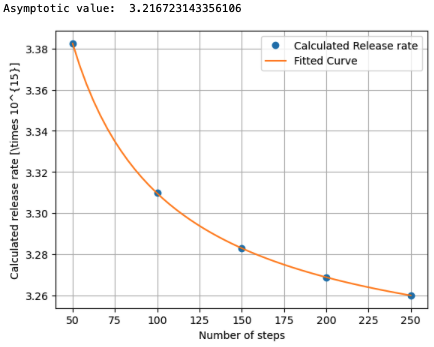

Here we see that the release rate converges to an asympthote of 3.217e15, where for 100 steps a release of 3.31e15 was calculated. This is not too far off and thus we are going to continue with 100 steps with the sidenote that it is not exact. 

There is also the issue of stability. The finite difference scheme is stable for 


The stability condition is based on the Courant–Friedrichs–Lewy (CFL) condition, which is a necessary condition for convergence while solving certain partial differential equations (often hyperbolic PDEs) numerically using the method of finite differences.

The diffusion equation we're dealing with is parabolic in nature, but the CFL condition is still applicable because of its relationship with the time step, spatial step, and the diffusion coefficient. For the explicit finite difference method to be stable for diffusion-type (parabolic) problems, the CFL condition should satisfy:

\begin{equation}
    D \cdot \frac{\Delta t}{\Delta x^2} \le 1/2
\end{equation}

where D is the diffusion coefficient, Δt is the time step size, and Δx is the spatial step size.

If this condition is not met, numerical solutions can be unstable, and result in non-physical or incorrect answers. This is because the numerical approximation may start to introduce errors that grow rapidly with each timestep, leading to a solution that 'blows up'. This can manifest as extremely high or low values, NaNs, or Infs in your computed solution.

The CFL condition is essentially a restriction on how big a step you can take in space and time, given the "speed" of the process you're simulating, to accurately capture the behaviour of the system.



In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

N_20k_norm = [50, 100, 150, 200]
R_20k_norm = [3382508076113425.0, 3309713500050854.5, 3282683652651425.5, 3268612133327776.0]

N_40k_norm = [50, 100, 150, 200, 250]
R_40k_norm = [3.3825046683528970, 3.3097101403333610, 3.2826803091686350, 3.2686087979994660, 3.2599862110698135]

def power_law(x, a, b, c):
    return a * x**(-b) + c

# Fit the curve
params, _ = curve_fit(power_law, N_40k_norm, R_40k_norm)

# Calculate the asymptotic value (c parameter)
asymptotic_value = params[2]
print("Asymptotic value: ", asymptotic_value)

# Plot the original data and the fitted curve
x = np.linspace(50, 250, 50)
plt.plot(N_40k_norm, R_40k_norm, 'o', label='Calculated Release rate')
plt.plot(x, power_law(x, *params), label='Fitted Curve')
plt.xlabel('Number of steps')
plt.ylabel(r'Calculated release rate [\times 10^{15}]')
plt.legend()
plt.grid()
plt.show()

# Application 3: Release rate given a certain defect size (see methodology application section)
To do for baseline section: Calculate the release of isotopes for a minimum size defect, and call that the defect indicator!

In [247]:
class IsotopeDefectRelease:
    def __init__(self, D, Lamb, M_Isotope, f, defect_size):
        self.D = D
        self.Lamb = Lamb
        self.M_Isotope = M_Isotope
        self.f = f
        self.defect_size = defect_size

    def Finite_difference_scheme_water(self, M, N, Lamb, dt, dx, f):
        D = self.D

        u = np.zeros((N+1, M+1))
        u[0, :] = f

        R_t = np.zeros(M+1)

        for j in range(M):
            for i in range(1, N):
                u[i, j+1] = u[i, j] + D * dt / dx**2 * (u[i+1, j] - 2*u[i, j] + u[i-1, j]) - self.Lamb * dt * u[i, j]
            u[0, j+1] = u[0, j]
            u[N, j+1] = u[N, j] + D * dt / dx * (u[N-1, j] - u[N, j]) - self.Lamb * u[N, j]

            dc_dx = (u[N-1, j] - u[N, j]) / dx
            J = -D * dc_dx
            A = self.defect_size
            R_t[j+1] = -J * A

        return u, R_t

    def Calculate_Release_Rate(self, T, Sample_volume, Reactor_volume, M, N):
        Lamb_isotope = self.Lamb
        f = self.f
        defect_size = self.defect_size

        L = 0.00057
        dx = L/N
        dt = T/M
        
        Sample_volume = Sample_volume
        Reactor_volume = Reactor_volume
        u_isotope, R_isotope = self.Finite_difference_scheme_water(M, N, self.Lamb, dt, dx,f)
        Diffusion_rate = np.max(R_isotope)

        Release_Rate = Diffusion_rate * Sample_volume/ Reactor_volume
        return Release_Rate


In [256]:
import numpy as np
import pandas as pd

Days_in_period = [7]#, 14, 21, 28, 35]

Sample_volume = 50e-6  #m3
Reactor_volume = 110  #m3
defect_size = 3.9675862452815095e-09

T = 400
N = 90
M = 70000

# Create a new DataFrame with the same index as df_All
release_rates_defect = pd.DataFrame(index=Days_in_period, columns=[iso['name'] for iso in All_isotopes])

# Iterate over the days in operation
# Loop over each isotope and each day in operation
for iso in All_isotopes:
    for day in Days_in_period:
        # Get concentration for specific isotope and day
        f = df_All.loc[day, iso['name']]
        
        # Initialize IsotopeDefectRelease class
        isotope_defect_release = IsotopeDefectRelease(iso['D_water'], iso['Lamb'], iso['M_Isotope'], f, defect_size)
        
        # Calculate the release rate
        release_rate = isotope_defect_release.Calculate_Release_Rate(T, Sample_volume, Reactor_volume, M, N)
        
        # Store the release rate in the new DataFrame
        release_rates_defect.loc[day, iso['name']] = release_rate

In [265]:
def Fraction_Offgass(lamb):
    a = 0.9684804466977627 
    b = -3.287416467804109e-06
    t_half = np.log(2)/lamb
    return a*np.exp(b*t_half)

# List of noble gas isotopes to correct for off gassing
noble_gas_isotopes = ['Kr85m', 'Kr87', 'Kr88','Kr89', 'Xe131m', 'Xe133', 'Xe135', 'Xe138']

# Loop over noble_gas_isotopes and apply the correction
for isotope in noble_gas_isotopes:
    # Get the decay coefficient variable dynamically
    decay_coefficient = globals()[f'Lamb_{isotope}']
    
    off_gassing_correction = Fraction_Offgass(decay_coefficient)
    print(isotope, off_gassing_correction)
    # Divide isotope column by the off gassing correction
    # If the result is negative, set it to zero
    release_rates_defect[isotope] = release_rates_defect[isotope].apply(lambda x: max(0, x * off_gassing_correction))


Kr85m 0.9161234587768466
Kr87 0.9538793573708817
Kr88 0.937246364176452
Kr89 0.9678731684049988
Xe131m 0.003257209990700899
Xe133 0.1694764167322992
Xe135 0.803214416573561
Xe138 0.9657945051040139


In [266]:
# Generate LaTeX table from DataFrame
latex_table = release_rates_defect.transpose().to_latex()

# Print the LaTeX table
print(latex_table)


\begin{tabular}{ll}
\toprule
{} &            7 \\
\midrule
Br84   &     3.956522 \\
Kr85m  &   224.230153 \\
Kr87   &   109.372877 \\
Kr88   &   312.689108 \\
Kr89   &     7.413858 \\
Rb88   &    83.993603 \\
Rb89   &     8.582355 \\
Sr89   &  3977.871583 \\
Sr91   &   425.204188 \\
Sr92   &   121.827596 \\
Y91    &  4904.423277 \\
Y91m   &   291.356393 \\
Y92    &   285.272072 \\
Y93    &    482.95553 \\
Sr93   &     4.888123 \\
Y94    &    12.506728 \\
Zr95   &  7124.565871 \\
Nb95   &  4799.452395 \\
Nb97   &  1315.180004 \\
Zr97   &  1045.207468 \\
Ru103  &  2369.883831 \\
Ru105  &     0.402914 \\
Rh105  &   258.455359 \\
Te129  &    43.044719 \\
Te131  &    16.113172 \\
Te132  &   1965.11039 \\
I131   &  6140.675947 \\
I132   &     3.743595 \\
I133   &   4736.07192 \\
I134   &   160.131567 \\
Xe131m &     0.000858 \\
Xe133  &   410.421437 \\
I135   &   953.700857 \\
Xe135  &  1725.977934 \\
Cs136  &    14.885365 \\
Cs137  &  17534.53836 \\
Xe138  &    32.252968 \\
Cs138  &   120.2

/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_54113/1828361970.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = release_rates_defect.transpose().to_latex()


In [226]:
release_rates_defect['I132']

7    3.583892
Name: I132, dtype: object

In [232]:


# Create an empty DataFrame with the same shape and column names as measurable_All
is_detected_malf = pd.DataFrame(index=release_rates_defect.index, columns=release_rates_defect.columns)

# Iterate over each isotope in the measurable_All DataFrame
for isotope in release_rates_defect.columns:
    # Check if the isotope is in the Detection_limits dictionary
    if isotope in Detection_limits:
        # If it is, compare the measured activity to the detection limit
        is_detected_malf[isotope] = release_rates_defect[isotope].apply(lambda x: f'yes, {x}' if x >= Detection_limits[isotope] else 'no')

is_detected_malf


,Br84,Kr85m,Kr87,Kr88,Kr89,Rb88,Rb89,Sr89,Sr91,Sr92,...,Xe138,Cs138,Ba139,Ba140,La140,La141,La142,Ce141,Ce143,Ce144
7,no,"yes, 234.3182140249576",no,"yes, 340.7777757901147",no,no,no,no,"yes, 407.0648216053204",no,...,no,no,no,"yes, 4349.629193421212","yes, 4587.353588903789",no,no,"yes, 4619.91280281928","yes, 1375.6158934871276","yes, 5018.17151902726"
